# Análisis exploratorio de datos (EDA)
### Autores: Ricardo, Eusebio, Marcos, Adrián, Javier Gamero Muñoz 

# Índice 
* [Introducción al problema](#introducción-al-problema)
* [Recodificación de variables](#recodificación-de-variables)
  * [Variable ```Cabin```](#recodificación-de-la-variable-cabin)
  * [Creación de la variable ```Alone```](#creación-de-la-variable-alone)
* [Valores perdidos / *Missing values*](#valores-perdidos-o-missing-values)
  * [Missing values categóticos](#missing-values-categóricos)
  * [Missing values numéricos](#missing-values-numéricos)

# Introducción al problema
El problema que se presenta tiene lugar en el año 2912, donde la nave espacial 
*Titanic* colisionó con una anomalía espacial. Como resultado de este accidente, 
algunos de los pasajeros fueron transportados a otra dimensión, y el objetivo es 
clasificar (a partir de aquellos que sabemos que han sido transportados,
**train**) si un menor grupo de personas (**test**) han sido transportados o 
no.  
Para ello se hará uso de cinco algoritmos de clasificación: 
* *k nearest neighbors (kNN)* 
* Árboles de clasificación
* *Supported vector machine (SVM)*
* Regresión logística
* Naïve Bayes

Los datos recogidos están separados en dos datasets, ```train.csv``` y 
```test.csv```, teniendo el primero de ellos los casos donde sí se conoce el 
destino de las personas (si han sido transportadas o no), mientras que en el 
segundo de ellos no. 
Comenzamos estudiando las variables del dataset ```train.csv```:

In [1]:
library(tidyverse)
library(Amelia)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



In [2]:
df = read.csv("data/train.csv", header = TRUE)
head(df)
str(df)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False
2,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True
3,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False
4,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False
5,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True
6,0005_01,Earth,False,F/0/P,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True


'data.frame':	8693 obs. of  14 variables:
 $ PassengerId : chr  "0001_01" "0002_01" "0003_01" "0003_02" ...
 $ HomePlanet  : chr  "Europa" "Earth" "Europa" "Europa" ...
 $ CryoSleep   : chr  "False" "False" "False" "False" ...
 $ Cabin       : chr  "B/0/P" "F/0/S" "A/0/S" "A/0/S" ...
 $ Destination : chr  "TRAPPIST-1e" "TRAPPIST-1e" "TRAPPIST-1e" "TRAPPIST-1e" ...
 $ Age         : num  39 24 58 33 16 44 26 28 35 14 ...
 $ VIP         : chr  "False" "False" "True" "False" ...
 $ RoomService : num  0 109 43 0 303 0 42 0 0 0 ...
 $ FoodCourt   : num  0 9 3576 1283 70 ...
 $ ShoppingMall: num  0 25 0 371 151 0 3 0 17 0 ...
 $ Spa         : num  0 549 6715 3329 565 ...
 $ VRDeck      : num  0 44 49 193 2 0 0 NA 0 0 ...
 $ Name        : chr  "Maham Ofracculy" "Juanna Vines" "Altark Susent" "Solam Susent" ...
 $ Transported : chr  "False" "True" "False" "False" ...


Es posible observar que se tienen 8693 observaciones y 14 variables, de las 
cuales 8 están formadas por strings y el resto son numéricas.   
De la página de 
[kaggle](https://www.kaggle.com/competitions/spaceship-titanic/data)
con los datos se obtiene la siguiente información de los atributos:
* ```PassengerId```: identifiación para cada pasajero en el formato *gggg_pp* 
  donde *gggg* indica su grupo de viaje y *pp* su número en él. Personas en un 
  mismo grupo suelen ser familias, aunque no siempre.
* ```Homeplanet```: planeta donde embarca el pasajero.
* ```CryoSleep```: indica si el pasajero fue puesto en animación suspendida 
  durante el viaje.
* ```Cabin```: número de cabina donde el pasajero viajaba en el formato 
  *deck/num/side* donde *side* puede ser *P* para *babor* o *S* para *estribor*.
* ```Destination```: planeta donde el pasajero desembarca.
* ```Age```: edad del pasajero.
* ```VIP```: indica si el pasajero tenía un servicio VIP durante el viaje.
* ```RoomService```, ```FoodCourt```, ```ShoppingMall```, ```Spa```, 
  ```VRDeck```: cantidad de dinero empleado en los distintos servicios de la nave.
* ```Name```: nombre y primer apellido del pasajero.
* ```Transported```: **variable de salida**, indica si el pasajero fue 
  transportado a otra dimensión o no.

# Recodificación de variables
Para comenzar, se recodifican algunas de las variables expuestas y se crean otras
que puede resultar de importancia.
## Recodificación de la variable ```cabin``` 
La variable ```Cabin```, con el formato *deck/num/side* podría ser dividida en 
tres variables diferentes: ```Cabin_deck```, ```Cabin_num``` y ```Cabin_side```:

In [3]:
cabin_splitted = str_split(df$Cabin, '/', simplify = TRUE)
#id_splitted = str_split(df$PassengerId, '_', simplify = TRUE)

In [4]:
#colnames(id_splitted) = c('group_id','personal_id')
#head(id_splitted)

In [5]:
table(cabin_splitted[, 1])


        A    B    C    D    E    F    G    T 
 199  256  779  747  478  876 2794 2559    5 

In [6]:
table(cabin_splitted[, 3])


        P    S 
 199 4206 4288 

In [7]:
df = df %>% mutate(Cabin_deck = cabin_splitted[, 1], 
                   Cabin_num = as.integer(cabin_splitted[, 2]), 
                   Cabin_side = cabin_splitted[, 3]) %>% select(-Cabin)
head(df)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,0001_01,Europa,False,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False,B,0,P
2,0002_01,Earth,False,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True,F,0,S
3,0003_01,Europa,False,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False,A,0,S
4,0003_02,Europa,False,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False,A,0,S
5,0004_01,Earth,False,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True,F,1,S
6,0005_01,Earth,False,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True,F,0,P


Es apreciable que algunos de los caracteres son vacíos, estos son valores 
perdidos que serán tratados más adelante. 

## Creación de la variable ```Alone```
También, la variable ```PassengerId``` en el formato *gggg_pp* nos indica si los 
pasajeros viajaban solos o en grupo, creamos una variable que indique esto:

In [8]:
df = df %>% mutate(Group = (str_split(PassengerId, '_', simplify = TRUE))[,1])
vector_group = df %>% count(Group) %>% filter(n > 1)
vector_group = vector_group$Group
df = df %>% mutate(Alone = ifelse(Group %in% vector_group, "False", "True")) %>% select(-Group)

In [9]:
head(df)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side,Alone
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,0001_01,Europa,False,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False,B,0,P,True
2,0002_01,Earth,False,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True,F,0,S,True
3,0003_01,Europa,False,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False,A,0,S,False
4,0003_02,Europa,False,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False,A,0,S,False
5,0004_01,Earth,False,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True,F,1,S,True
6,0005_01,Earth,False,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True,F,0,P,True


In [10]:
df %>% count(Alone)

Alone,n
<chr>,<int>
False,3888
True,4805


# Valores perdidos o *Missing values*
Una vez recodificadas las variables para entender mejor los datos, se procede a 
estudiar los valores perdidos del dataset ```train.csv```.

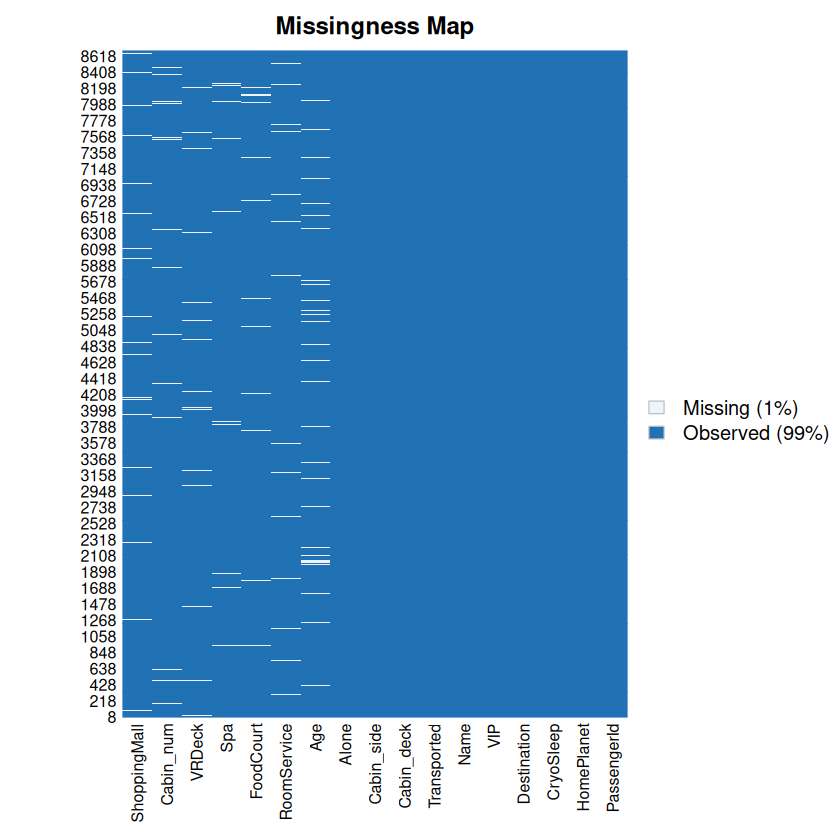

In [11]:
missmap(df)

In [12]:
print(table(df$HomePlanet))
print(table(df$Destination))
print(table(df$CryoSleep))
print(table(df$VIP))


        Earth Europa   Mars 
   201   4602   2131   1759 

                55 Cancri e PSO J318.5-22   TRAPPIST-1e 
          182          1800           796          5915 

      False  True 
  217  5439  3037 

      False  True 
  203  8291   199 


Como se pudo observar con la variable ```Cabin```, los valores perdidos parecen 
estar registrados como caracteres vacíos, los convertimos en ```NA```:

In [13]:
df$Cabin_deck[df$Cabin_deck == ""] = NA
df$Cabin_num[df$Cabin_num == ""] = NA
df$Cabin_side[df$Cabin_side == ""] = NA
df$HomePlanet[df$HomePlanet == ""] = NA
df$Destination[df$Destination == ""] = NA
df$CryoSleep[df$CryoSleep == ""] = NA
df$VIP[df$VIP == ""] = NA

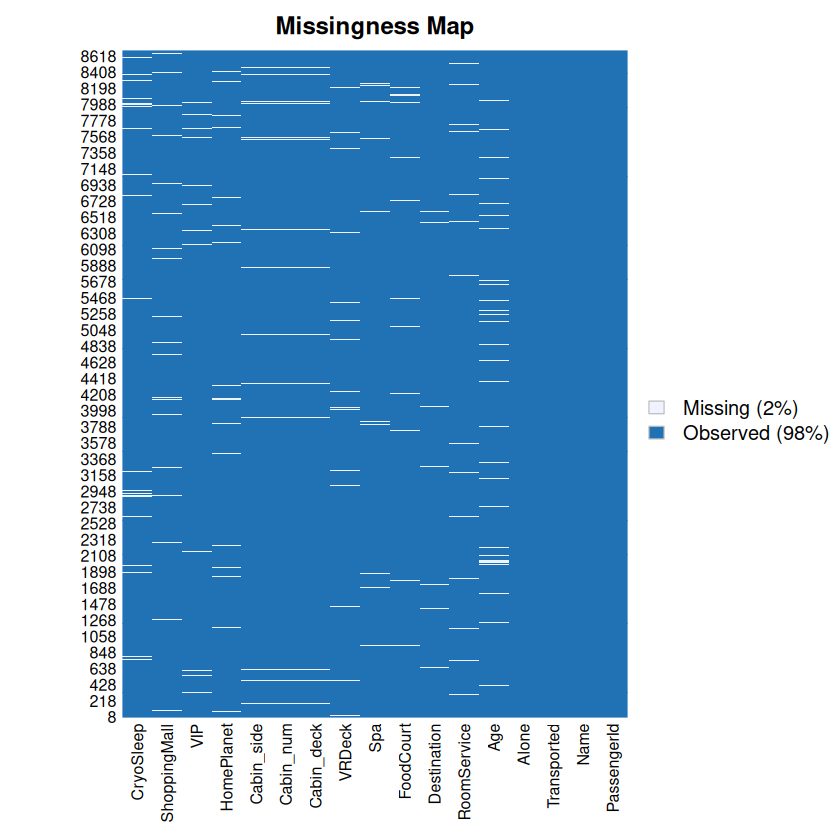

In [14]:
missmap(df)

En total, los valores perdidos no suponen un gran porcentaje del dataset 
completo, por lo que se evalúa cuantas instancias eliminaríamos de borrar 
aquellas con algún valor perdido:

In [15]:
# Porcentaje de filas incompletas
sum(!complete.cases(df))/nrow(df)

[1] 0.2219027

De eliminar estas filas, eliminaríamos el $22\%$ de los datos, por lo que 
se descarta esta opción. Una imputación es necesaria.

## Missing values categóricos
Se comienza con aquellas variables categóricas. Como método de imputación 
general, se le asignará a cada ```NA``` la **moda** de su atributo:

In [16]:
mode_hp = (df %>% group_by(HomePlanet) %>% summarize(n = n()) %>% na.omit %>% top_n(1))$HomePlanet
mode_cabin_deck = (df %>% group_by(Cabin_deck) %>% summarize(n = n()) %>% na.omit %>% top_n(1))$Cabin_deck
mode_cabin_side = (df %>% group_by(Cabin_side) %>% summarize(n = n()) %>% na.omit %>% top_n(1))$Cabin_side
mode_dest = (df %>% group_by(Destination) %>% summarize(n = n()) %>% na.omit %>% top_n(1))$Destination
mode_cs = (df %>% group_by(CryoSleep) %>% summarize(n = n()) %>% na.omit %>% top_n(1))$CryoSleep
mode_vip = (df %>% group_by(VIP) %>% summarize(n = n()) %>% na.omit %>% top_n(1))$VIP


Selecting by n
Selecting by n
Selecting by n
Selecting by n
Selecting by n
Selecting by n


In [17]:
df_mode = data.frame(mode_hp = mode_hp, mode_cabin_deck = mode_cabin_deck, mode_cabin_side = mode_cabin_side, mode_cs = mode_cs, mode_vip = mode_vip, mode_dest = mode_dest)
df_mode
write.csv(df_mode,'data/modes.csv')

mode_hp,mode_cabin_deck,mode_cabin_side,mode_cs,mode_vip,mode_dest
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Earth,F,S,False,False,TRAPPIST-1e


In [18]:
df_imputed = data.frame(df)

In [19]:
df_imputed$Cabin_deck[is.na(df_imputed$Cabin_deck)] = mode_cabin_deck
df_imputed$Cabin_side[is.na(df_imputed$Cabin_side)] = mode_cabin_side
df_imputed$HomePlanet[is.na(df_imputed$HomePlanet)] = mode_hp
df_imputed$Destination[is.na(df_imputed$Destination)] = mode_dest
df_imputed$VIP[is.na(df_imputed$VIP)] = mode_vip

Sin embargo, llama la atención el atributo ```CryoSleep```. Se observa que, en 
los casos donde sus variables numéricas (correspondientes a los gastos) son 
nulas, hay valores perdidos también:

In [20]:
df_imputed %>% filter(RoomService==0,FoodCourt == 0, ShoppingMall == 0, Spa == 0,
                     VRDeck == 0) %>% count(CryoSleep)

CryoSleep,n
<chr>,<int>
False,470
True,2690
NA,87


En concreto hay 87 valores perdidos, 2690 casos donde esto se cumple y 470 donde 
no. Dado que la mayoría de pasajeros que no han gastado dinero en el viaje son 
personas en animación suspendida, se imputan estos 87 valores perdidos como 
```CryoSleep = 'True'```.

In [21]:
cs_idTrue = df_imputed %>% filter(is.na(CryoSleep),RoomService==0,
                                  FoodCourt == 0, ShoppingMall == 0, Spa == 0,
                                  VRDeck == 0) %>% select(PassengerId)

df_imputed[df_imputed$PassengerId %in% cs_idTrue[,1],]$CryoSleep = 'True'

Por el contrario, si alguno de los gastos es distinto de cero, se podría 
considerar que el pasajero no está en animación suspendida:

In [22]:
df_imputed %>% filter(RoomService!=0 | FoodCourt != 0 | ShoppingMall != 0 | Spa != 0 |
                     VRDeck != 0) %>% count(CryoSleep)

CryoSleep,n
<chr>,<int>
False,4921
NA,119


En efecto, todas las personas que han tenido algún gasto en la nave no están en 
animación suspendida a excepción de los valores perdidos. Los imputamos como 
```CryoSleep = 'False'```:

In [23]:
cs_idFalse = df_imputed %>% filter(is.na(CryoSleep), (RoomService!=0 | FoodCourt != 0 | ShoppingMall != 0 | Spa != 0 |
                     VRDeck != 0)) %>% select(PassengerId) 

In [24]:
df_imputed[df_imputed$PassengerId %in% cs_idFalse[,1],]$CryoSleep = 'False'

In [25]:
df_imputed %>% filter(is.na(CryoSleep))

PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side,Alone
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
0115_01,Mars,NA,TRAPPIST-1e,26,False,0,0,0,0,NA,Rohs Pead,True,F,24,P,True
1624_03,Earth,NA,TRAPPIST-1e,4,False,0,0,0,0,NA,Eristy Barbes,True,G,250,S,False
2291_01,Earth,NA,55 Cancri e,6,False,0,0,0,NA,0,Patoya Pittler,False,G,365,S,False
2584_01,Earth,NA,PSO J318.5-22,21,False,0,0,NA,0,0,Lilace Woodwardy,False,G,417,P,True
2822_02,Earth,NA,TRAPPIST-1e,5,False,0,0,0,0,NA,Salley Harverez,False,G,450,S,False
3476_01,Earth,NA,55 Cancri e,4,False,0,NA,0,0,0,Gabrie Joycerton,True,G,571,P,False
4127_01,Europa,NA,TRAPPIST-1e,23,False,0,0,0,0,NA,Dsch Ainserfle,True,B,130,P,True
6139_01,Europa,NA,TRAPPIST-1e,0,False,0,0,NA,0,0,Azhasim Bewarsecal,True,C,230,S,False
7314_01,Europa,NA,TRAPPIST-1e,33,False,0,0,0,NA,0,Aldun Venticable,True,C,237,P,True


Pero sigue habiendo 11 valores perdidos en esta variable en los casos donde 
alguno de los gastos también son ```NA```. Se comprueba que son 11 casos:

In [26]:
df_imputed %>% filter((is.na(RoomService) | RoomService == 0),
                      (is.na(FoodCourt) | FoodCourt == 0), 
                      (is.na(Spa) | Spa == 0), 
                      (is.na(ShoppingMall) | ShoppingMall == 0), 
                      (is.na(VRDeck) | VRDeck == 0)) %>%
               mutate(total_expenses = RoomService + FoodCourt + Spa + ShoppingMall + VRDeck) %>%
               filter(is.na(total_expenses)) %>% count(CryoSleep)

CryoSleep,n
<chr>,<int>
False,48
True,347
NA,11


Imputamos estos casos como ```CryoSleep = 'True'```, dado que es extraño que 
los pasajeros solo gasten en uno de los servicios y que justo ese sea un valor 
perdido también:

In [27]:
cs_idTrue_NAnum = df_imputed %>% filter(is.na(CryoSleep)) %>% select(PassengerId)

In [28]:
df_imputed[df_imputed$PassengerId %in% cs_idTrue_NAnum[,1],]$CryoSleep = 'True'

In [29]:
df_imputed %>% count(CryoSleep)

CryoSleep,n
<chr>,<int>
False,5558
True,3135


## Missing values numéricos
Procedemos ahora con los valores perdidos numéricos.

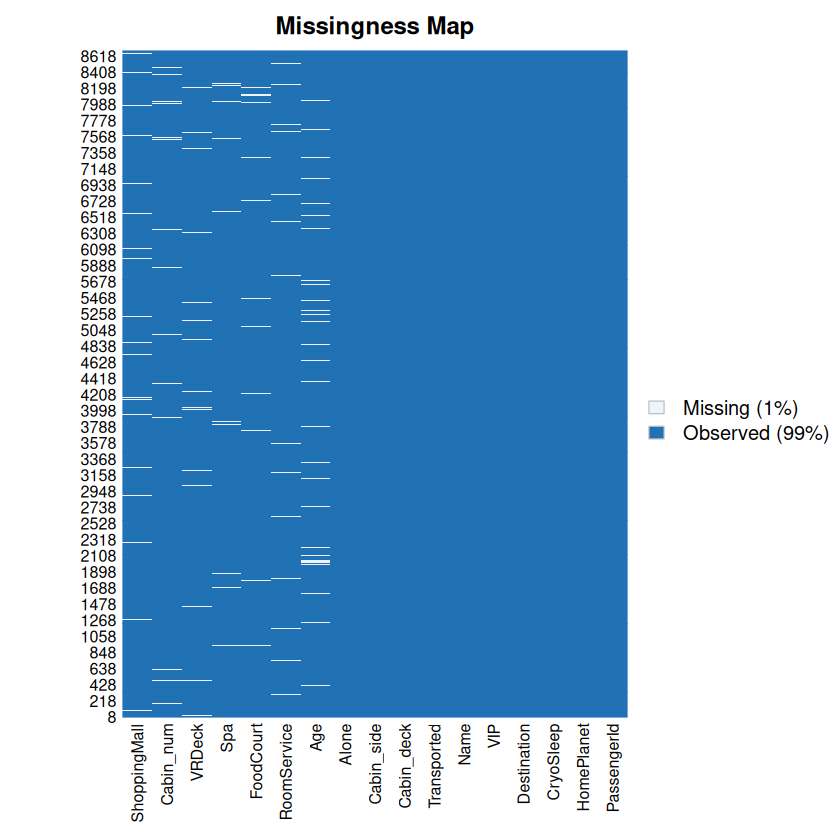

In [30]:
missmap(df_imputed)

Comenzamos con los casos donde alguno de los gastos es un valor perdido, el 
resto son cero y están en animación suspendida:

In [31]:
df_imputed %>% filter(CryoSleep == "True", (is.na(RoomService) | is.na(VRDeck) | is.na(Spa) | is.na(ShoppingMall) | is.na(FoodCourt))) %>%
                  mutate(total_expenses = RoomService + FoodCourt + Spa + ShoppingMall + VRDeck) %>%
                  filter(is.na(total_expenses)) %>% head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side,Alone,total_expenses
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
1,0006_02,Earth,True,TRAPPIST-1e,28,False,0,0,0,0,NA,Candra Jacostaffey,True,G,0,S,False,NA
2,0008_02,Europa,True,TRAPPIST-1e,34,False,0,0,NA,0,0,Altardr Flatic,True,B,1,P,False,NA
3,0020_03,Earth,True,55 Cancri e,29,False,0,0,NA,0,0,Mollen Mcfaddennon,False,E,0,S,False,NA
4,0020_05,Earth,True,PSO J318.5-22,1,False,NA,0,0,0,0,Mael Brantuarez,False,E,0,S,False,NA
5,0024_01,Europa,True,TRAPPIST-1e,62,False,0,0,NA,0,0,Penton Fullided,True,C,2,S,True,NA
6,0039_01,Earth,True,55 Cancri e,30,False,0,0,NA,0,0,Jorgie Batthewitt,False,G,1,P,True,NA


Como mencionamos anteriormente, las personas en animación suspendida no han 
podido tener gastos, por lo que estos valores perdidos deben ser cero:

In [32]:
expenses_IdZero_RoomService = df_imputed %>% filter(CryoSleep == "True", is.na(RoomService)) %>% select(PassengerId)
expenses_IdZero_VRDeck = df_imputed %>% filter(CryoSleep == "True", is.na(VRDeck)) %>% select(PassengerId)
expenses_IdZero_Spa = df_imputed %>% filter(CryoSleep == "True", is.na(Spa)) %>% select(PassengerId)
expenses_IdZero_ShoppingMall = df_imputed %>% filter(CryoSleep == "True", is.na(ShoppingMall)) %>% select(PassengerId)
expenses_IdZero_FoodCourt = df_imputed %>% filter(CryoSleep == "True", is.na(FoodCourt)) %>% select(PassengerId)

In [33]:
df_imputed[df_imputed$PassengerId %in% expenses_IdZero_RoomService[,1],]$RoomService = 0
df_imputed[df_imputed$PassengerId %in% expenses_IdZero_VRDeck[,1],]$VRDeck = 0
df_imputed[df_imputed$PassengerId %in% expenses_IdZero_Spa[,1],]$Spa = 0
df_imputed[df_imputed$PassengerId %in% expenses_IdZero_ShoppingMall[,1],]$ShoppingMall = 0
df_imputed[df_imputed$PassengerId %in% expenses_IdZero_FoodCourt[,1],]$FoodCourt = 0

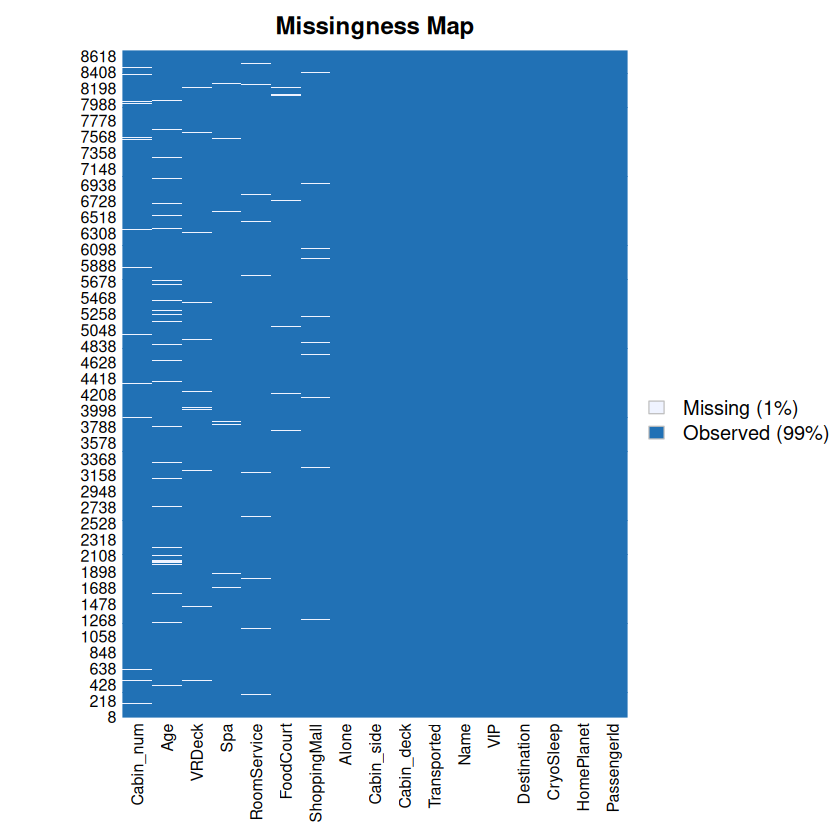

In [34]:
missmap(df_imputed)

Comprobamos los casos donde ```CryoSleep = 'False'``` y hay algún valor 
perdido en los gastos:

In [35]:
df_imputed %>% filter(CryoSleep == "False", (is.na(RoomService) | is.na(VRDeck) |
                      is.na(Spa) | is.na(ShoppingMall) | is.na(FoodCourt))) %>% 
                      head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side,Alone
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,0014_01,Mars,False,55 Cancri e,27,False,1286,122,NA,0,0,Flats Eccle,False,F,3,P,True
2,0031_03,Mars,False,TRAPPIST-1e,20,False,NA,0,1750,990,0,Dontch Datie,True,F,9,P,False
3,0050_01,Earth,False,55 Cancri e,35,False,790,0,0,NA,0,Sony Lancis,False,E,1,S,True
4,0103_01,Earth,False,TRAPPIST-1e,24,False,0,NA,0,0,17,Arlen Mclainez,True,F,24,S,False
5,0141_01,Mars,False,TRAPPIST-1e,31,False,NA,0,97,0,0,Pyrohs Harte,False,F,30,P,True
6,0164_01,Earth,False,TRAPPIST-1e,57,False,50,1688,0,NA,135,Fany Hutchinton,True,G,28,S,False


En estas observaciones, dada las distribuciones de las variables, se imputan 
los ```NA``` por las medianas de sus atributos:

In [36]:
expenses_IdMedian_RoomService = df_imputed %>% filter(CryoSleep == "False", is.na(RoomService)) %>% select(PassengerId)
expenses_IdMedian_VRDeck = df_imputed %>% filter(CryoSleep == "False", is.na(VRDeck)) %>% select(PassengerId)
expenses_IdMedian_Spa = df_imputed %>% filter(CryoSleep == "False", is.na(Spa)) %>% select(PassengerId)
expenses_IdMedian_ShoppingMall = df_imputed %>% filter(CryoSleep == "False", is.na(ShoppingMall)) %>% select(PassengerId)
expenses_IdMedian_FoodCourt = df_imputed %>% filter(CryoSleep == "False", is.na(FoodCourt)) %>% select(PassengerId)

In [37]:
vd_median = median(df_imputed$VRDeck, na.rm = TRUE)
spa_median = median(df_imputed$Spa, na.rm = TRUE)
sm_median = median(df_imputed$ShoppingMall, na.rm = TRUE)
fc_median = median(df_imputed$FoodCourt, na.rm = TRUE)
rs_median = median(df_imputed$RoomService, na.rm = TRUE)
age_median = median(df_imputed$Age, na.rm = TRUE)

df_imputed[df_imputed$PassengerId %in% expenses_IdMedian_RoomService[,1],]$RoomService = rs_median
df_imputed[df_imputed$PassengerId %in% expenses_IdMedian_VRDeck[,1],]$VRDeck = vd_median
df_imputed[df_imputed$PassengerId %in% expenses_IdMedian_Spa[,1],]$Spa = spa_median
df_imputed[df_imputed$PassengerId %in% expenses_IdMedian_ShoppingMall[,1],]$ShoppingMall = sm_median
df_imputed[df_imputed$PassengerId %in% expenses_IdMedian_FoodCourt[,1],]$FoodCourt = fc_median

In [38]:
df_median = data.frame(rs_median = rs_median, vd_median = vd_median, spa_median = spa_median, sm_median = sm_median, fc_median = fc_median, age_median = age_median)
df_median
write.csv(df_median,'data/median.csv')

rs_median,vd_median,spa_median,sm_median,fc_median,age_median
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,27


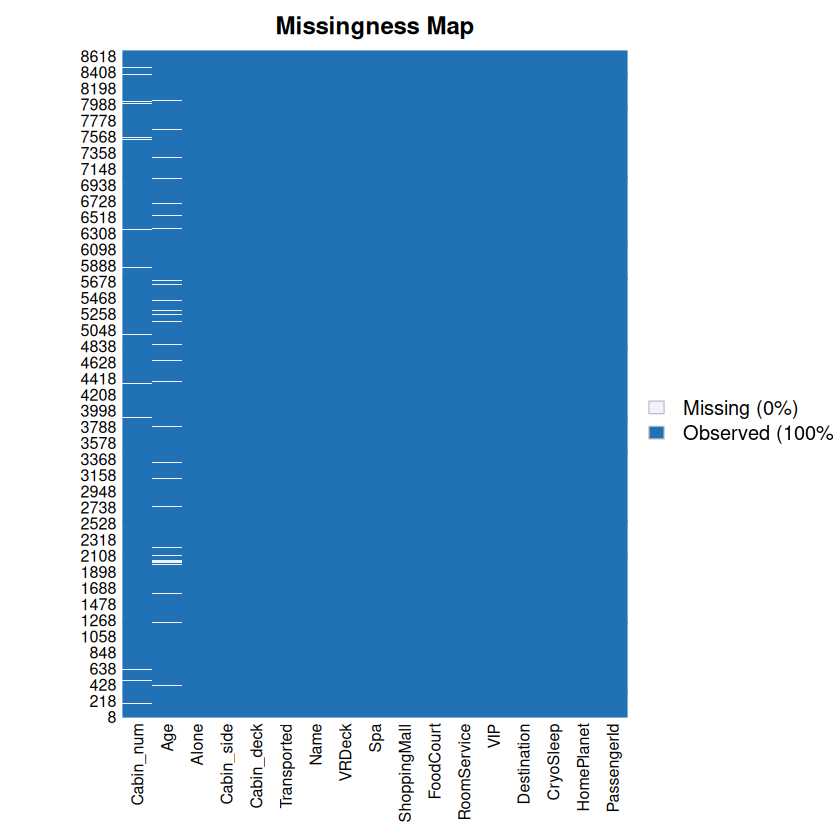

In [39]:
missmap(df_imputed)

In [40]:
df_imputed[is.na(df_imputed$Age), ]$Age = age_median

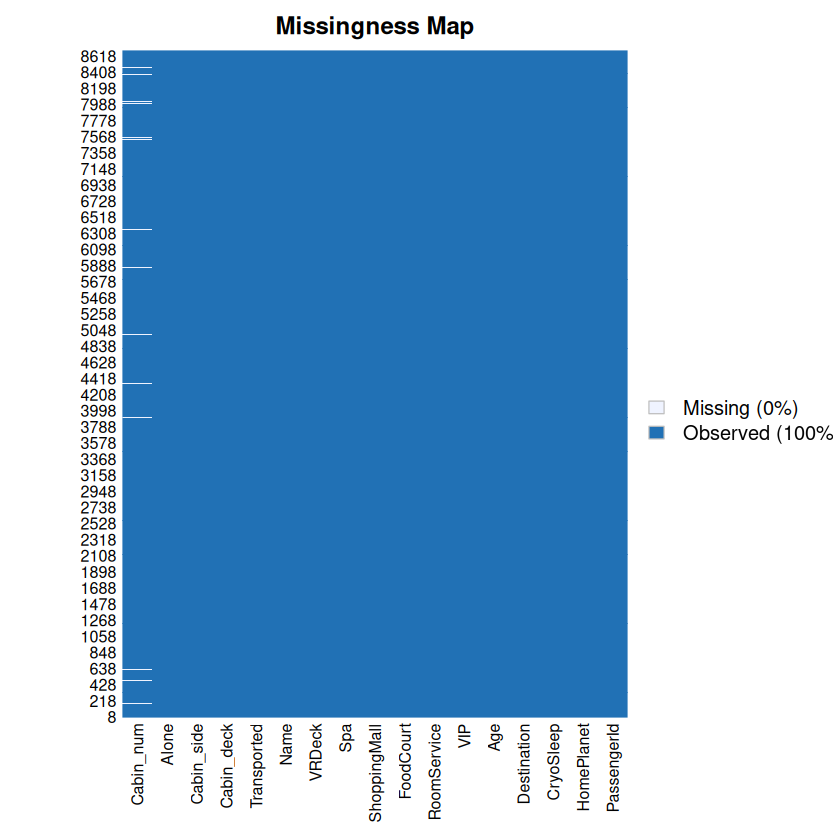

In [41]:
missmap(df_imputed)

In [42]:
df_imputed %>% filter(CryoSleep == "True") %>% count(Cabin_side, Cabin_deck)

Cabin_side,Cabin_deck,n
<chr>,<chr>,<int>
P,A,30
P,B,187
P,C,136
P,D,48
P,E,80
P,F,293
P,G,698
S,A,41
S,B,241


In [43]:
df_imputed %>% filter(VIP == "True") %>% count(CryoSleep)

CryoSleep,n
<chr>,<int>
False,178
True,21


In [44]:
df_imputed %>% filter(VIP == "True") %>% count(HomePlanet)

HomePlanet,n
<chr>,<int>
Earth,5
Europa,131
Mars,63


In [45]:
df_imputed %>% count(Cabin_side, HomePlanet, Cabin_deck)

Cabin_side,HomePlanet,Cabin_deck,n
<chr>,<chr>,<chr>,<int>
P,Earth,A,2
P,Earth,B,5
P,Earth,C,3
P,Earth,D,6
P,Earth,E,209
P,Earth,F,861
P,Earth,G,1276
P,Earth,T,1
P,Europa,A,115


In [46]:
df_imputed %>% count(HomePlanet, VIP)

HomePlanet,VIP,n
<chr>,<chr>,<int>
Earth,False,4798
Earth,True,5
Europa,False,2000
Europa,True,131
Mars,False,1696
Mars,True,63


In [47]:
df_imputed %>% count(HomePlanet, Alone)

HomePlanet,Alone,n
<chr>,<chr>,<int>
Earth,False,1624
Earth,True,3179
Europa,False,1392
Europa,True,739
Mars,False,872
Mars,True,887


### Distribuciones variables numéricas

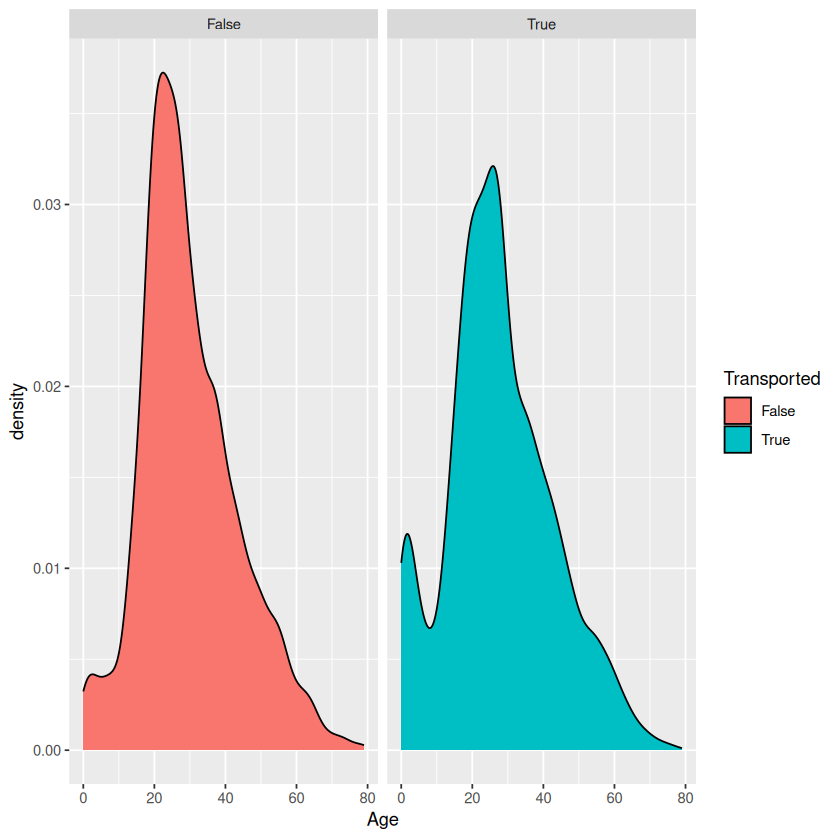

In [48]:
ggplot(df_imputed, aes(x = Age, fill = Transported)) +
    geom_density() +
    facet_wrap(~Transported)

In [49]:
str(df_imputed)

'data.frame':	8693 obs. of  17 variables:
 $ PassengerId : chr  "0001_01" "0002_01" "0003_01" "0003_02" ...
 $ HomePlanet  : chr  "Europa" "Earth" "Europa" "Europa" ...
 $ CryoSleep   : chr  "False" "False" "False" "False" ...
 $ Destination : chr  "TRAPPIST-1e" "TRAPPIST-1e" "TRAPPIST-1e" "TRAPPIST-1e" ...
 $ Age         : num  39 24 58 33 16 44 26 28 35 14 ...
 $ VIP         : chr  "False" "False" "True" "False" ...
 $ RoomService : num  0 109 43 0 303 0 42 0 0 0 ...
 $ FoodCourt   : num  0 9 3576 1283 70 ...
 $ ShoppingMall: num  0 25 0 371 151 0 3 0 17 0 ...
 $ Spa         : num  0 549 6715 3329 565 ...
 $ VRDeck      : num  0 44 49 193 2 0 0 0 0 0 ...
 $ Name        : chr  "Maham Ofracculy" "Juanna Vines" "Altark Susent" "Solam Susent" ...
 $ Transported : chr  "False" "True" "False" "False" ...
 $ Cabin_deck  : chr  "B" "F" "A" "A" ...
 $ Cabin_num   : int  0 0 0 0 1 0 2 0 3 1 ...
 $ Cabin_side  : chr  "P" "S" "S" "S" ...
 $ Alone       : chr  "True" "True" "False" "False" ...


In [50]:
hist_plot = function(variab,bins_=NULL,binwidth_=NULL){
    ggplot(df_imputed,aes(df_imputed[,variab],fill=Transported)) +
    geom_histogram(bins=bins_,binwidth=binwidth_) +
    labs(x = colnames(df_imputed)[variab])+ facet_wrap(~CryoSleep)
}


box_plot = function(variab){
    ggplot(df_imputed,aes(y=df_imputed[,variab],fill=Transported)) + geom_boxplot()+
    labs(y = colnames(df_imputed)[variab])+
    facet_wrap(~CryoSleep)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


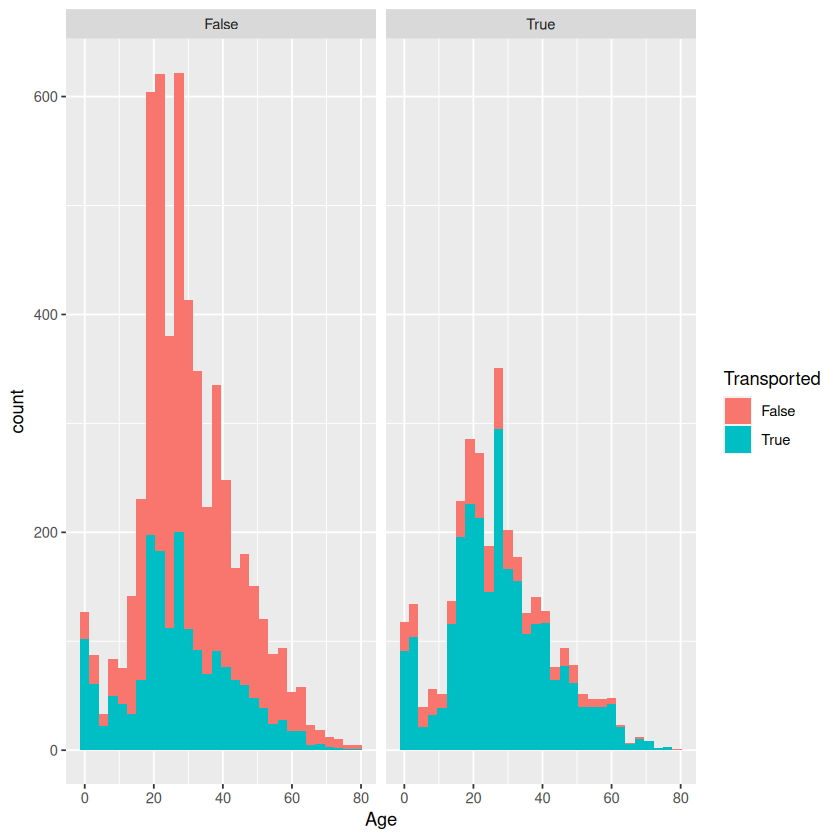

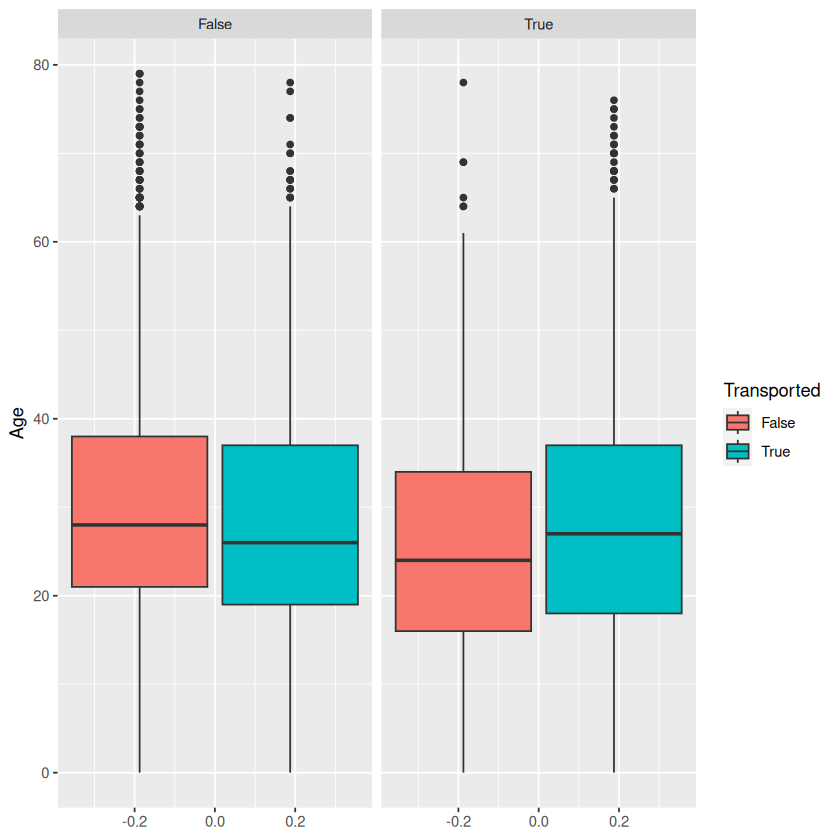

In [51]:
hist_plot(5)
box_plot(5)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


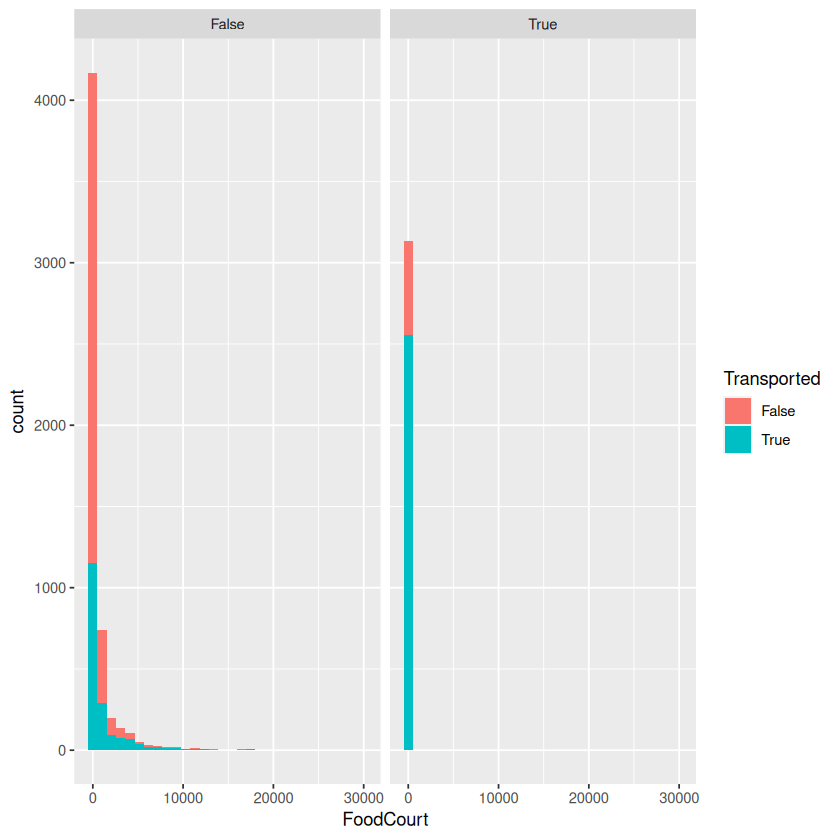

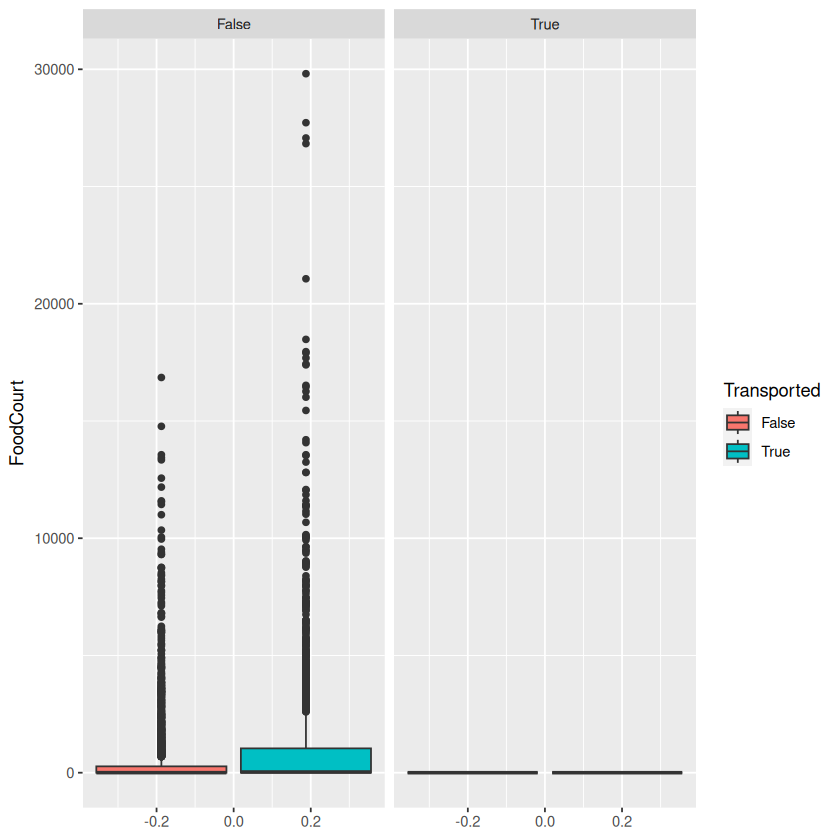

In [52]:
hist_plot(8)
box_plot(8)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


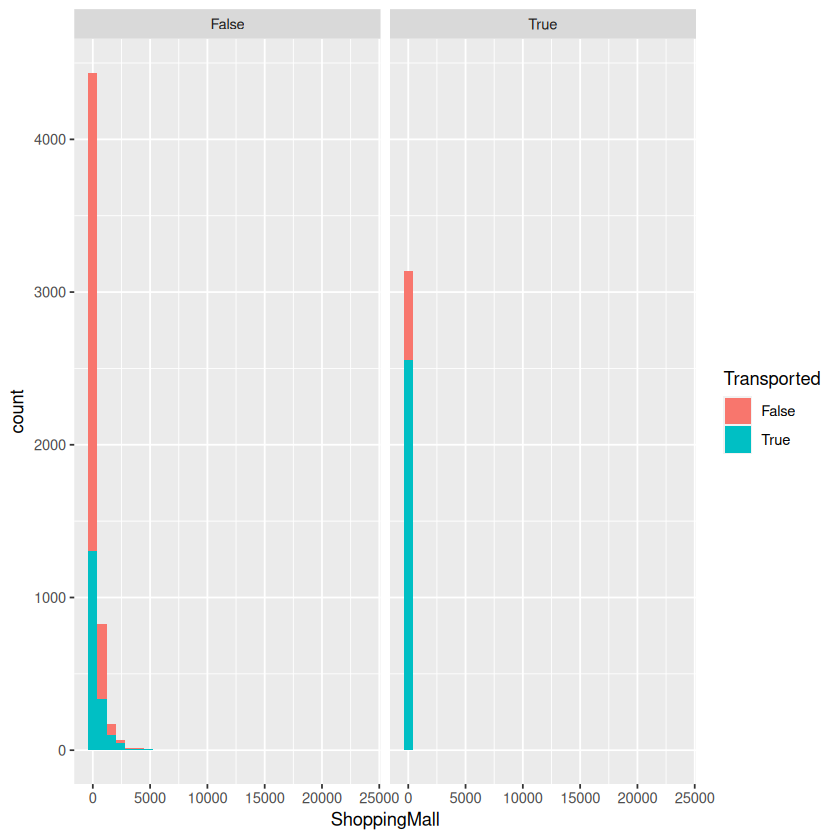

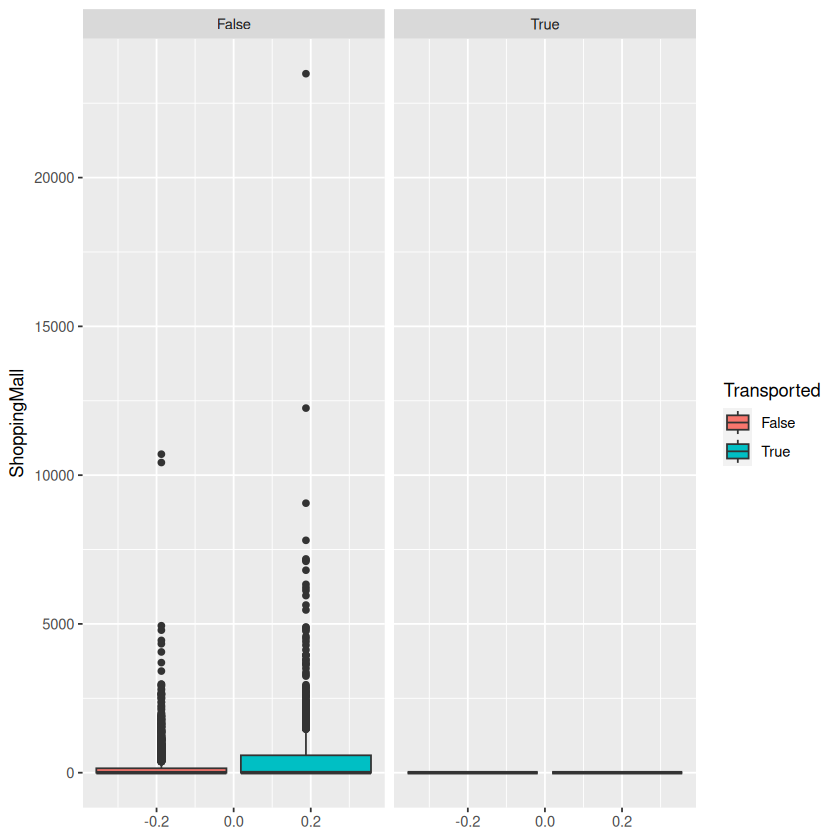

In [53]:
hist_plot(9)
box_plot(9)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


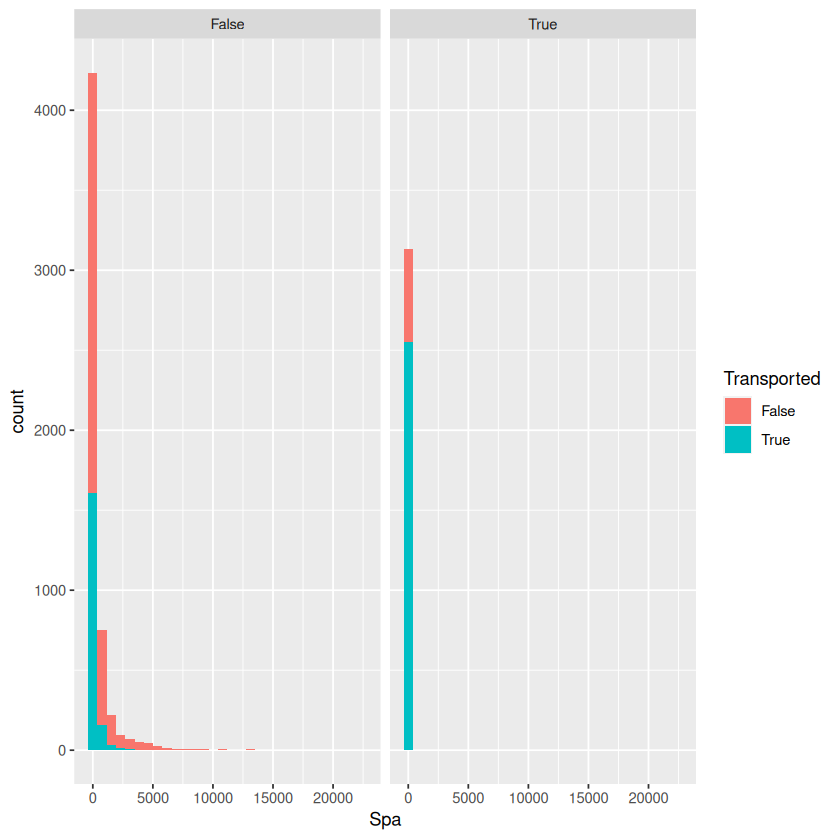

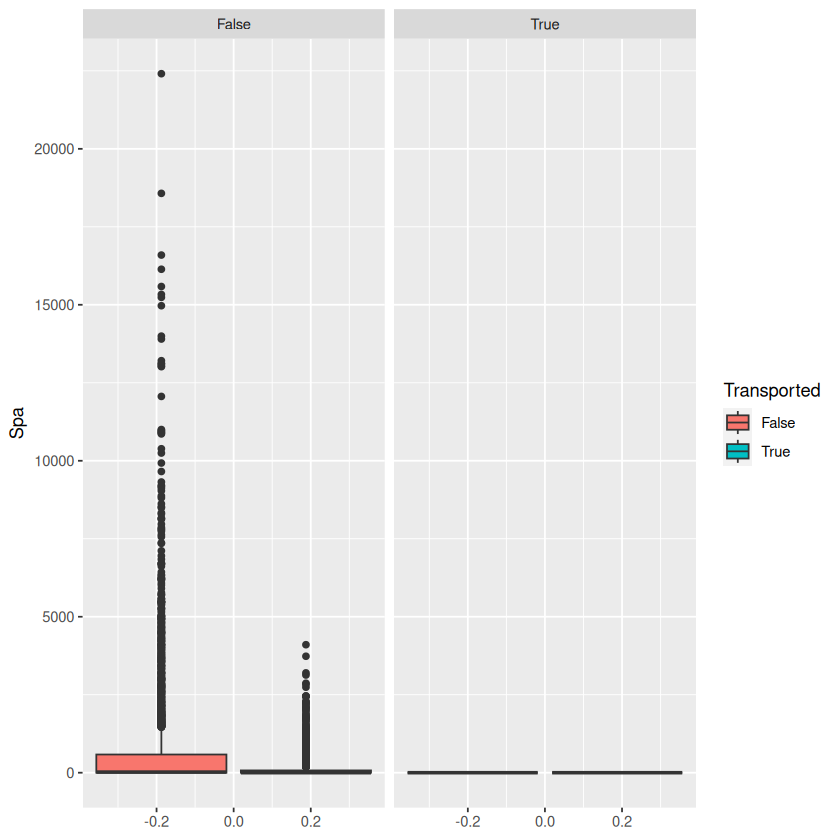

In [54]:
hist_plot(10)
box_plot(10)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


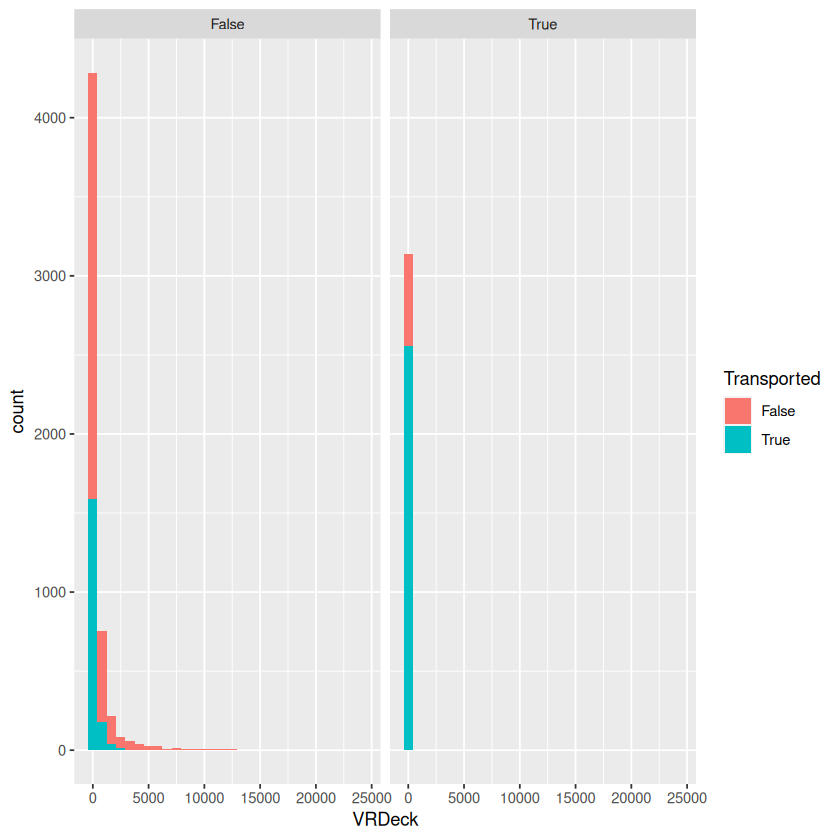

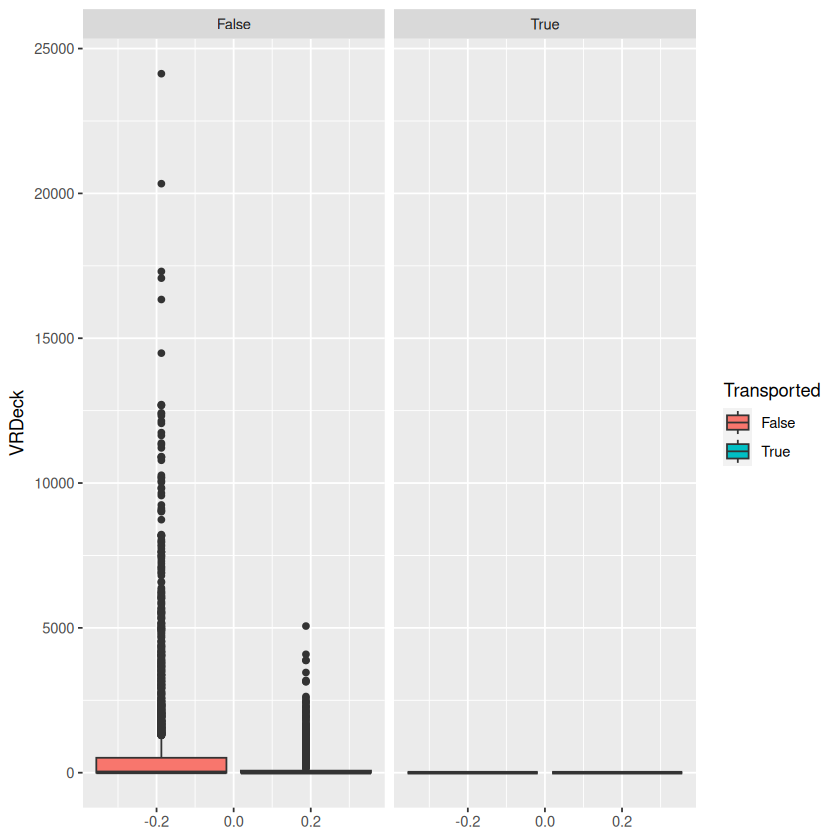

In [55]:
hist_plot(11)
box_plot(11)

### Análisis univariable

In [56]:
head(df_imputed)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side,Alone
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,0001_01,Europa,False,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False,B,0,P,True
2,0002_01,Earth,False,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True,F,0,S,True
3,0003_01,Europa,False,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False,A,0,S,False
4,0003_02,Europa,False,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False,A,0,S,False
5,0004_01,Earth,False,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True,F,1,S,True
6,0005_01,Earth,False,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True,F,0,P,True


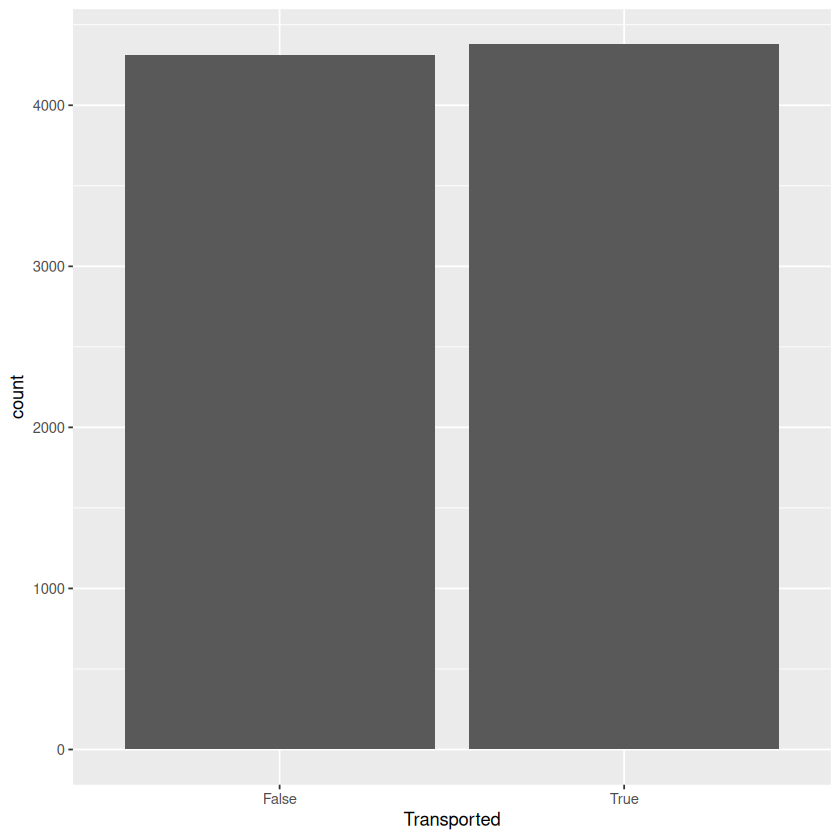

In [66]:
ggplot(df_imputed, aes(x = Transported)) +
    geom_bar()

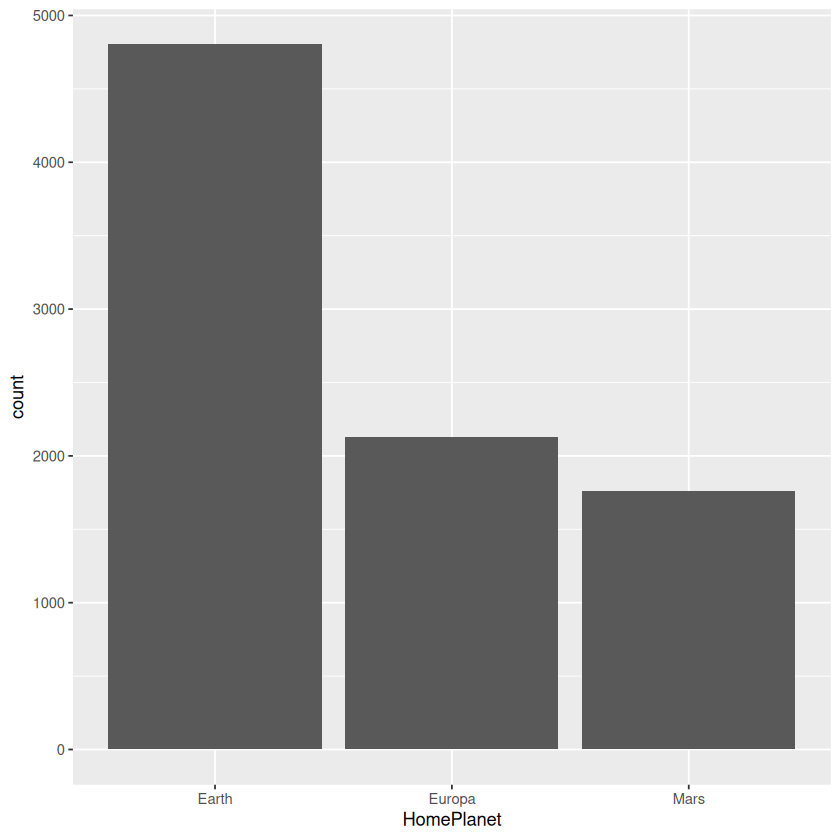

In [57]:
ggplot(df_imputed, aes(x = HomePlanet)) +
    geom_bar()

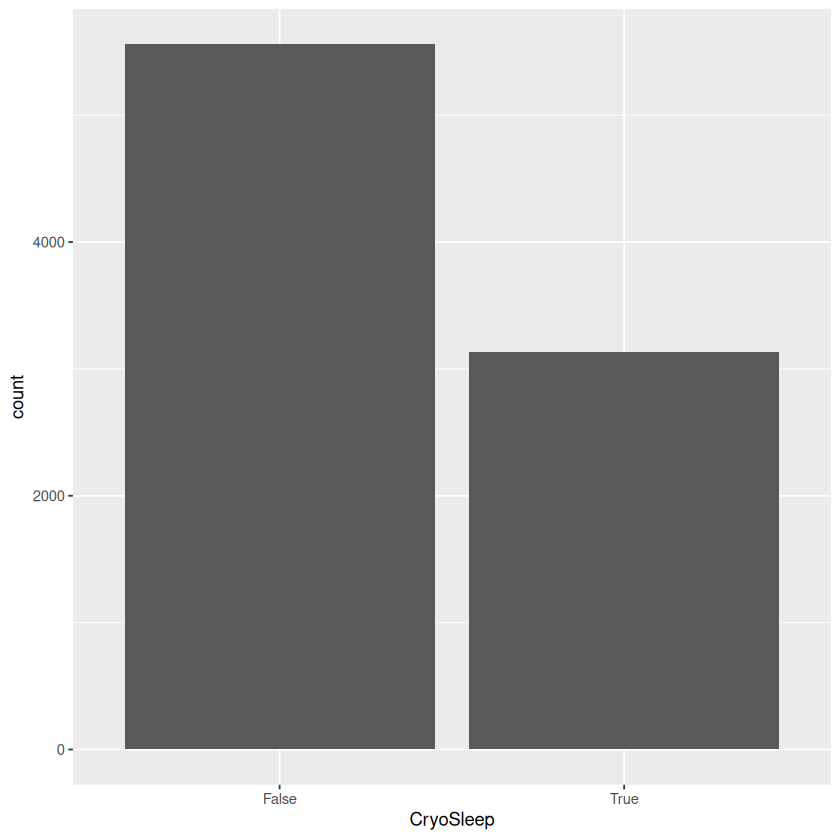

In [58]:
ggplot(df_imputed, aes(x = CryoSleep)) +
    geom_bar()

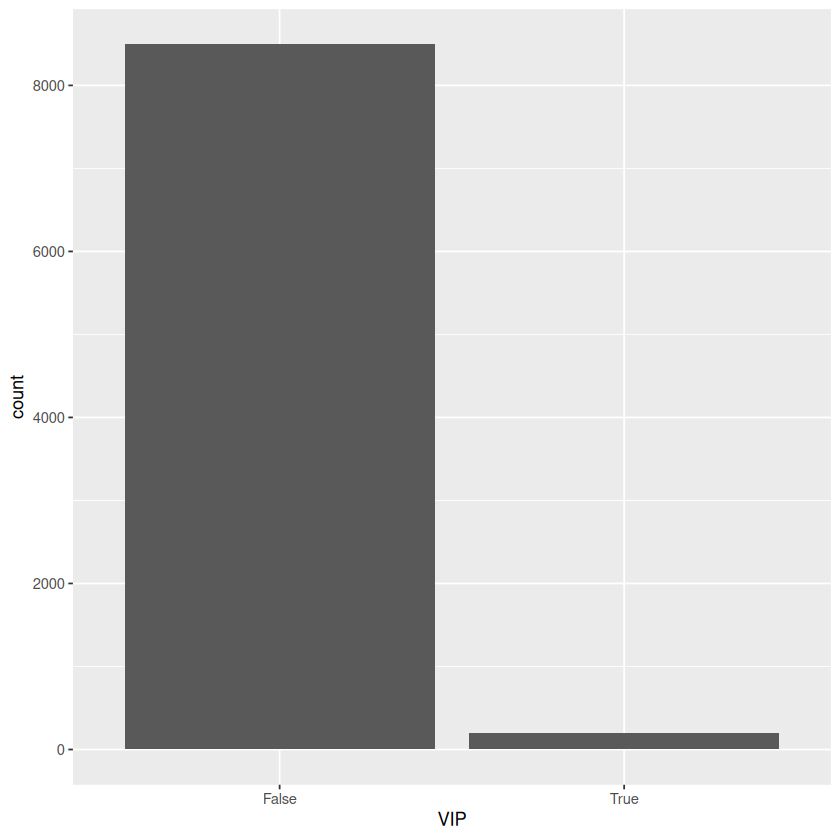

In [59]:
ggplot(df_imputed, aes(x = VIP)) +
    geom_bar()

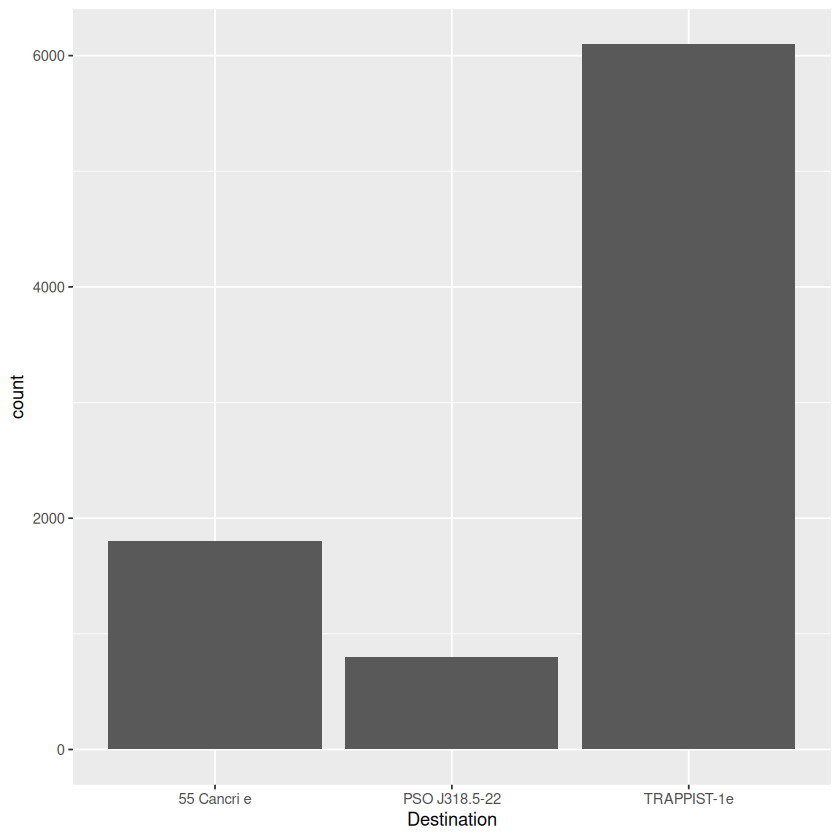

In [60]:
ggplot(df_imputed, aes(x = Destination)) +
    geom_bar()

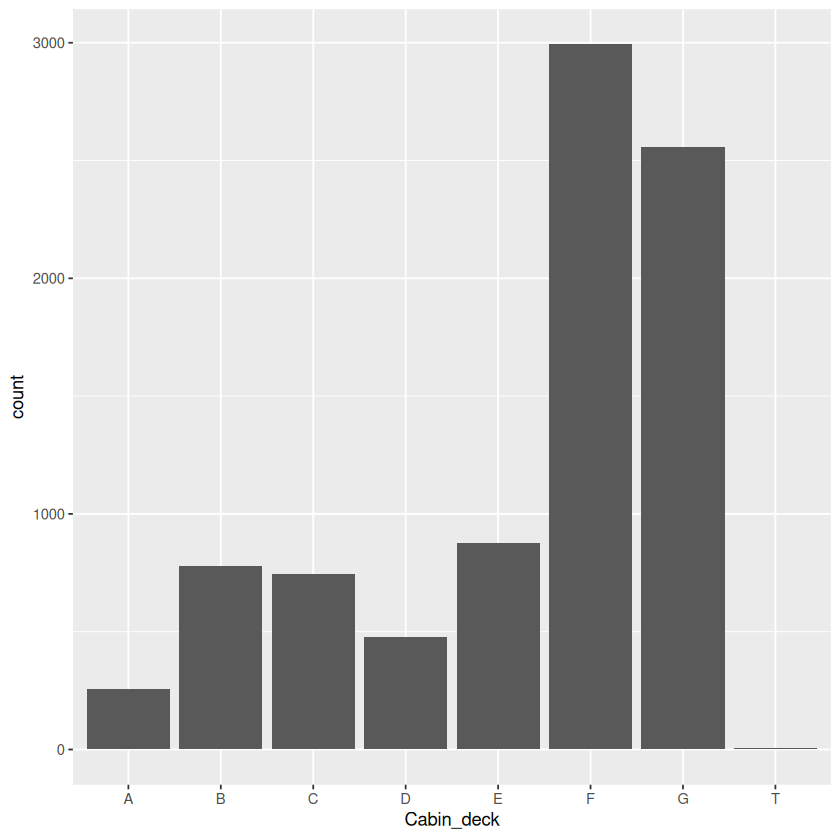

In [68]:
ggplot(df_imputed, aes(x = Cabin_deck)) +
    geom_bar()

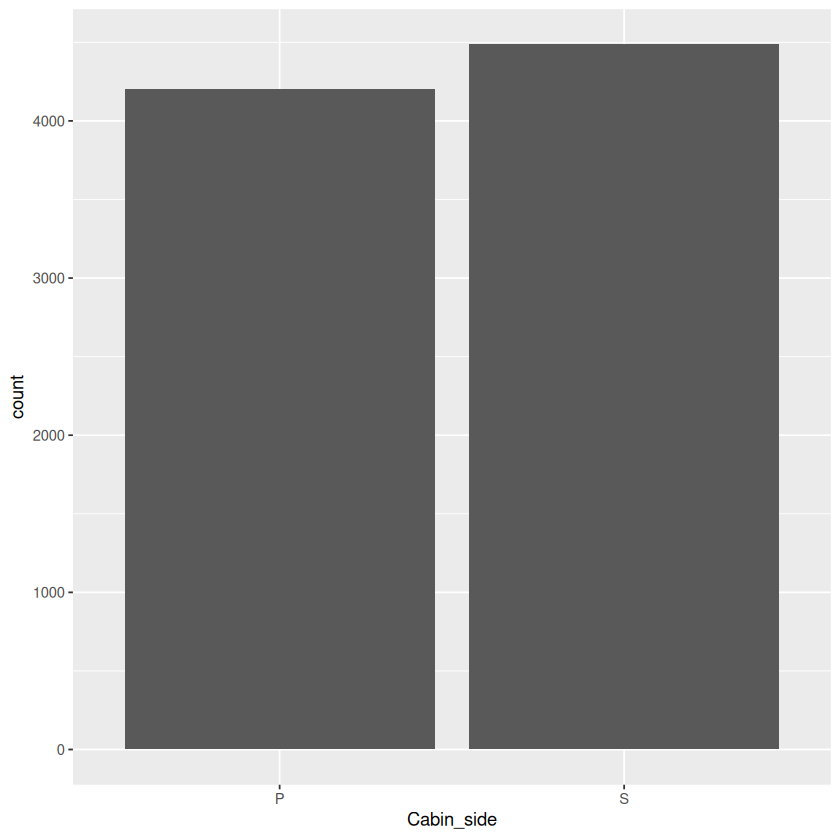

In [67]:
ggplot(df_imputed, aes(x = Cabin_side)) +
    geom_bar()

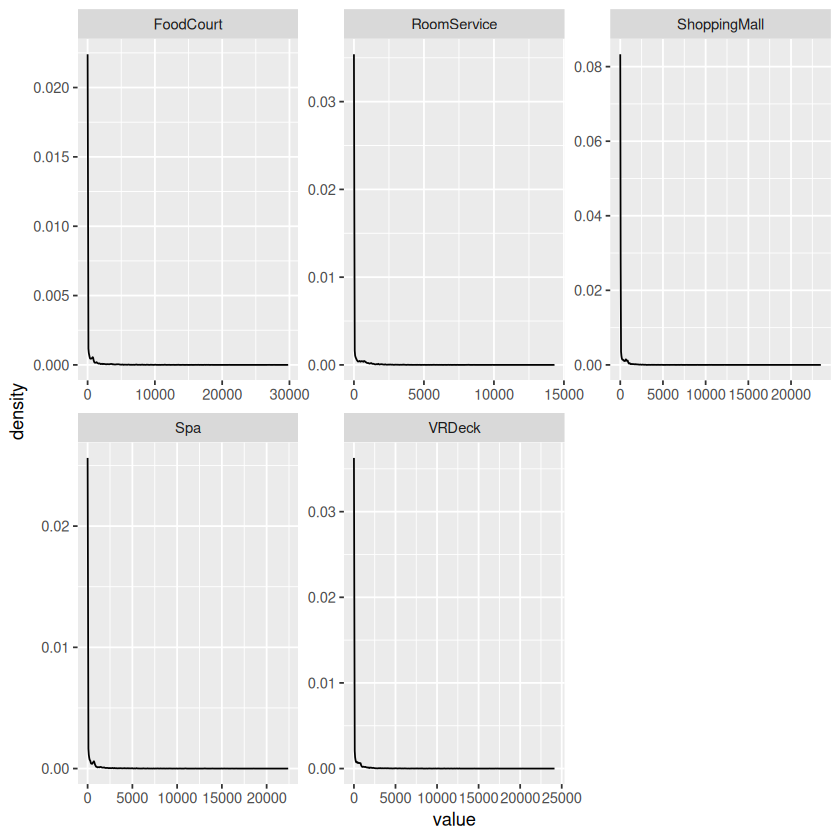

In [63]:
df_imputed %>% pivot_longer(cols = c("RoomService", "Spa", "FoodCourt", "VRDeck", "ShoppingMall")) %>%
               ggplot(., aes(x = value)) +
                geom_density() +
                facet_wrap(~name, scale = "free")

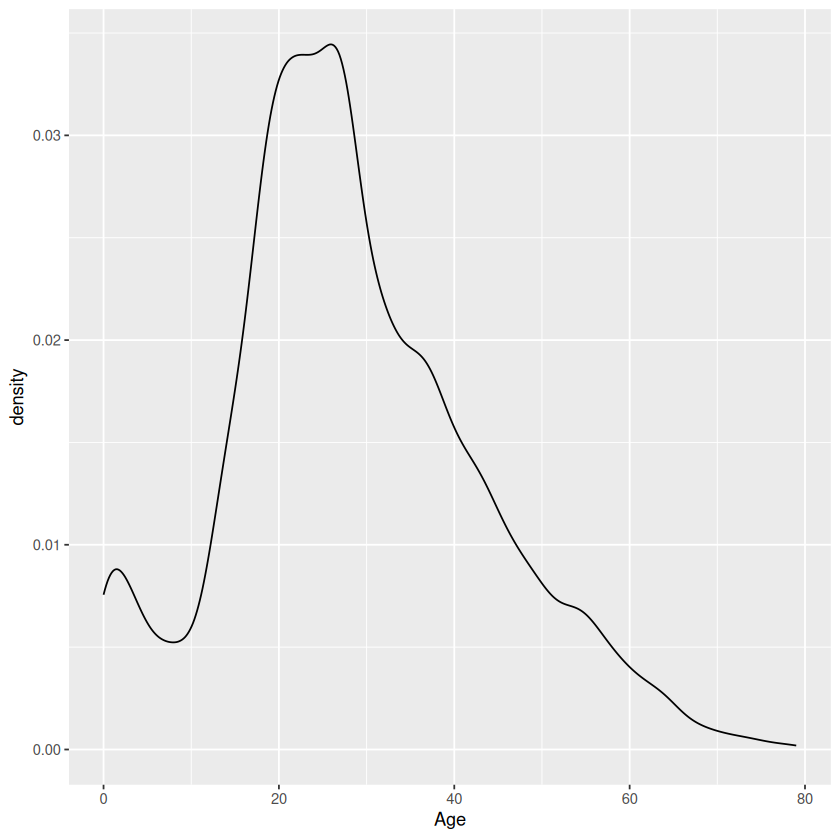

In [64]:
ggplot(df_imputed, aes(x = Age)) +
    geom_density()

### ANÁLISIS BIVARIABLE


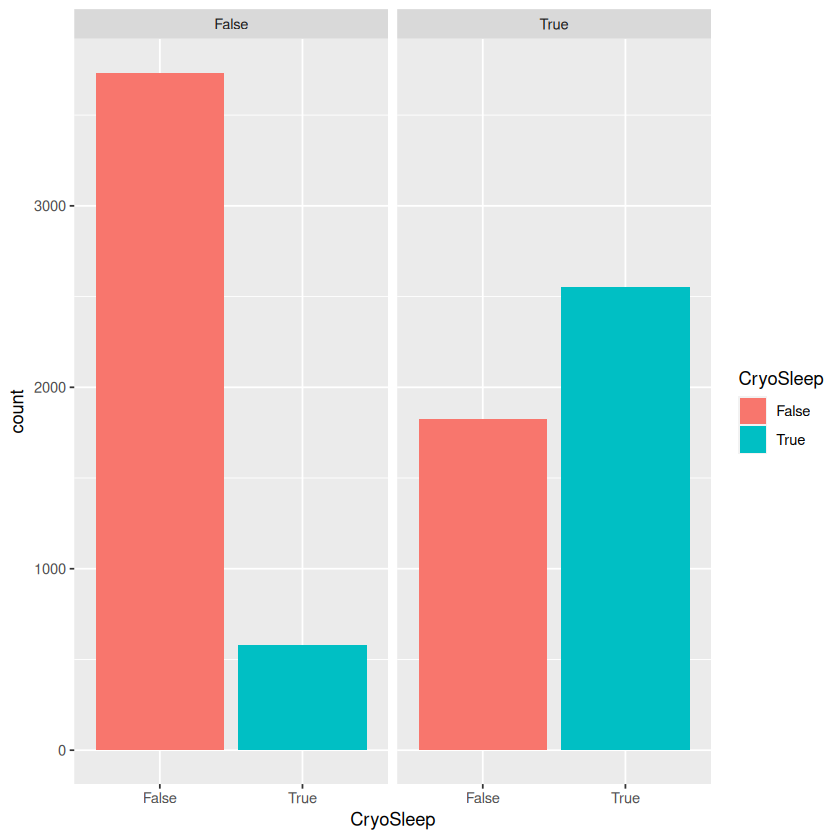

In [76]:
ggplot(df_imputed, aes(x = CryoSleep, fill = CryoSleep)) +
    geom_bar() +
    facet_wrap(~Transported)

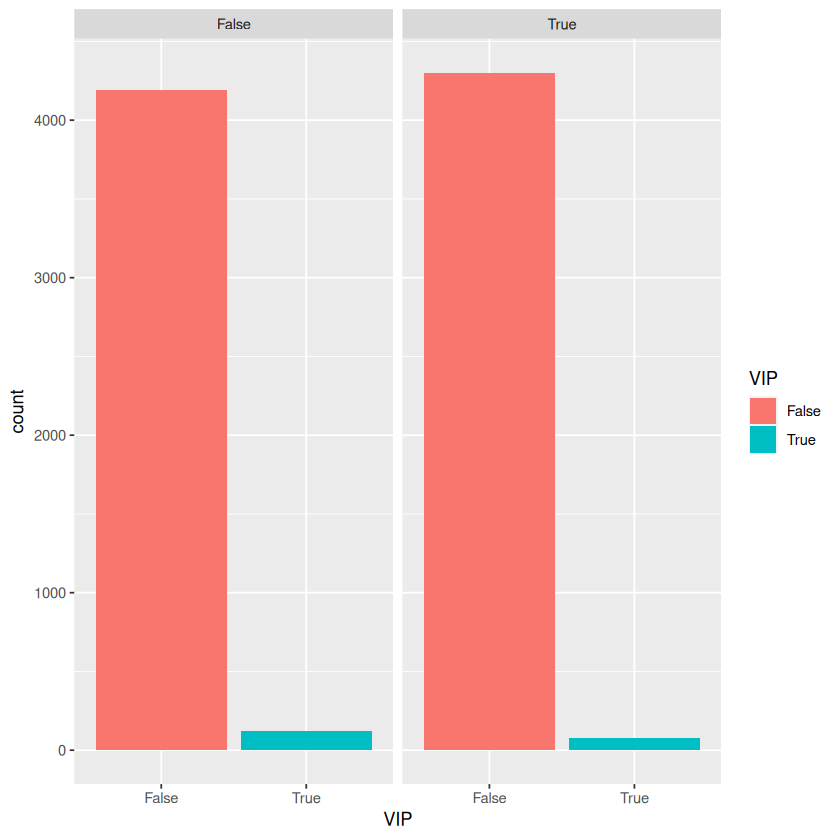

In [77]:
ggplot(df_imputed, aes(x = VIP, fill = VIP)) +
    geom_bar() +
    facet_wrap(~Transported)

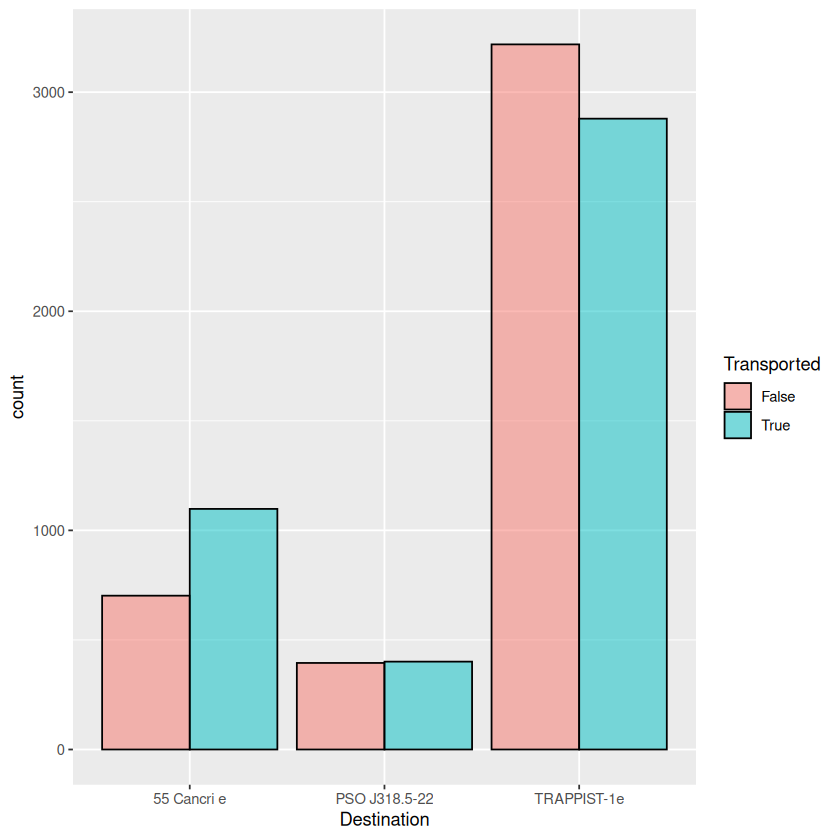

In [87]:
ggplot(df_imputed, aes(x = Destination, fill=Transported)) +
    geom_bar(color='black', alpha=0.5, position='dodge')

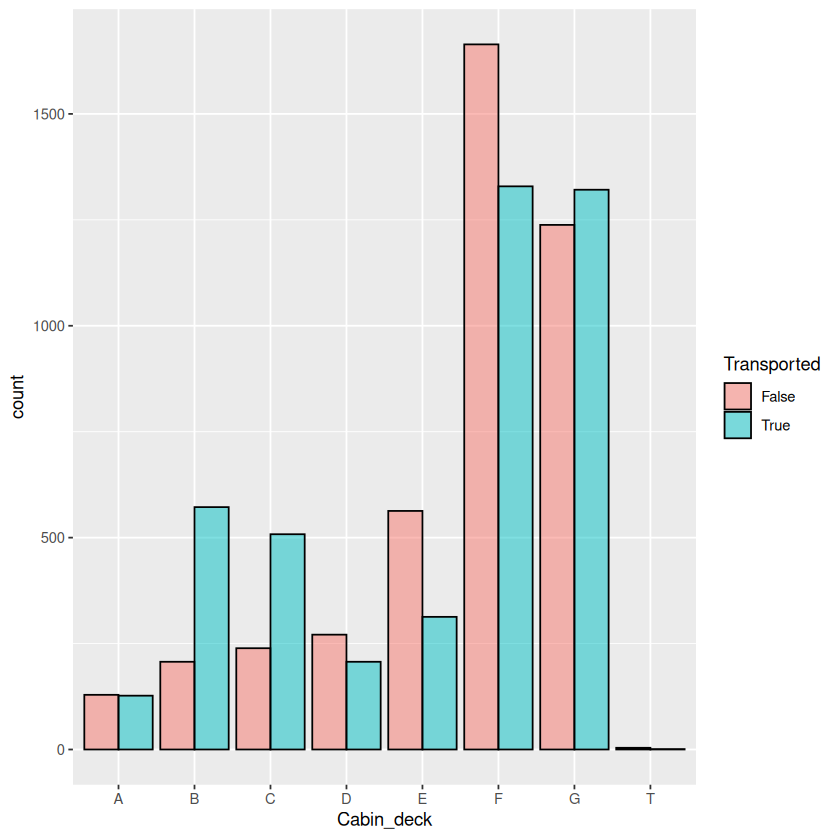

In [88]:
ggplot(df_imputed, aes(x = Cabin_deck, fill=Transported)) +
    geom_bar(color='black', alpha=0.5, position='dodge')

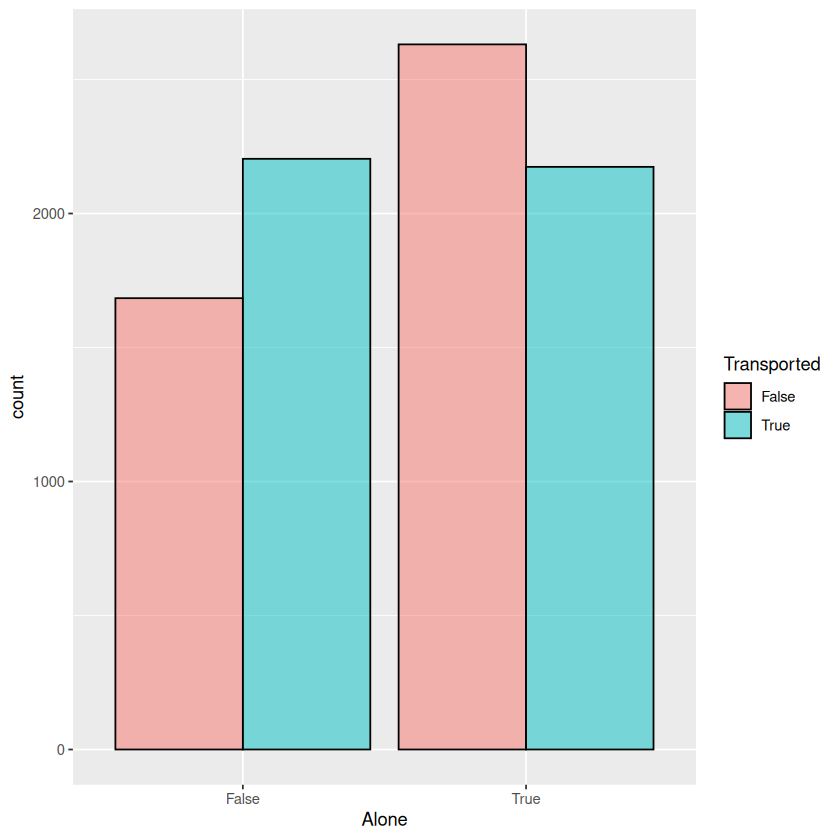

In [89]:
ggplot(df_imputed, aes(x = Alone, fill=Transported)) +
    geom_bar(color='black', alpha=0.5, position='dodge')

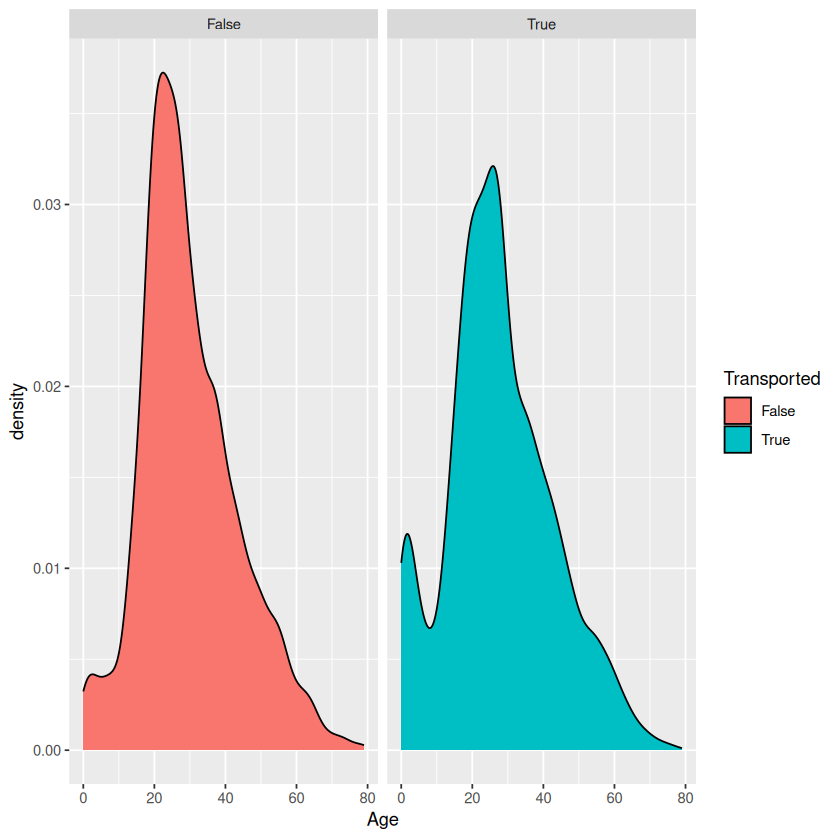

In [91]:
ggplot(df_imputed, aes(x = Age, fill=Transported)) +
    geom_density() +
    facet_wrap(~Transported)

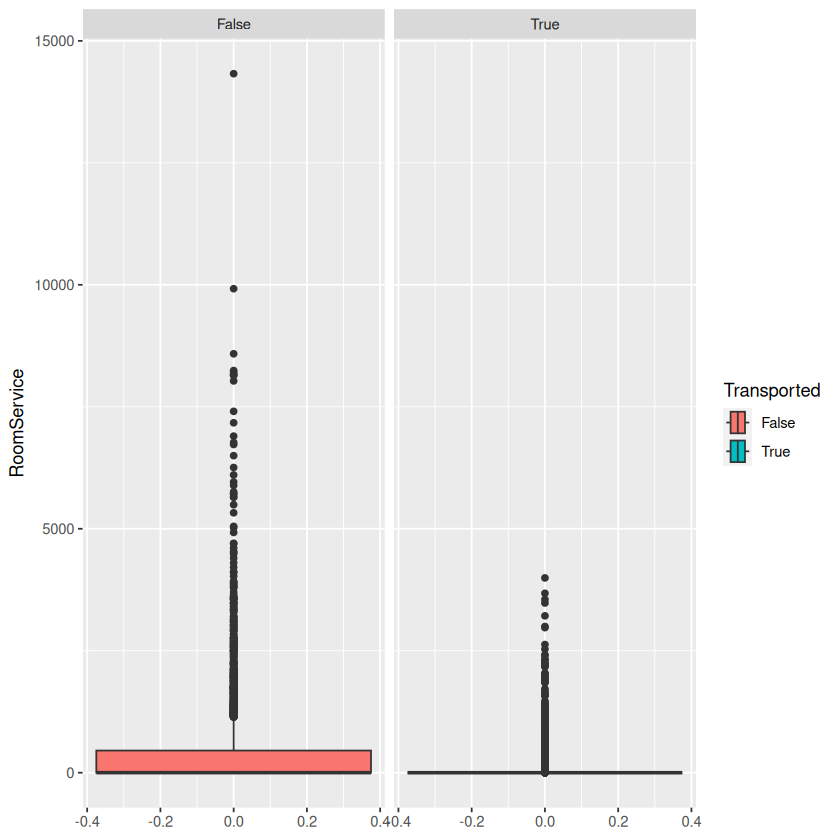

In [96]:
ggplot(df_imputed, aes(x = RoomService, fill = Transported)) +
    geom_boxplot() +
    coord_flip() +
    facet_wrap(~Transported)

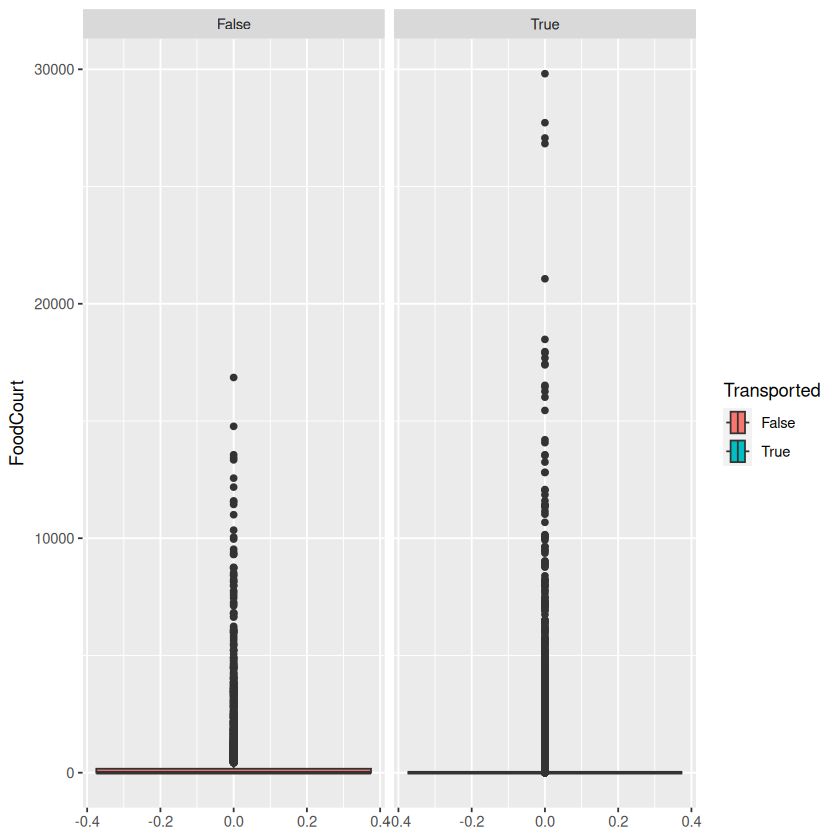

In [97]:
ggplot(df_imputed, aes(x = FoodCourt, fill = Transported)) +
    geom_boxplot() +
    coord_flip() +
    facet_wrap(~Transported)

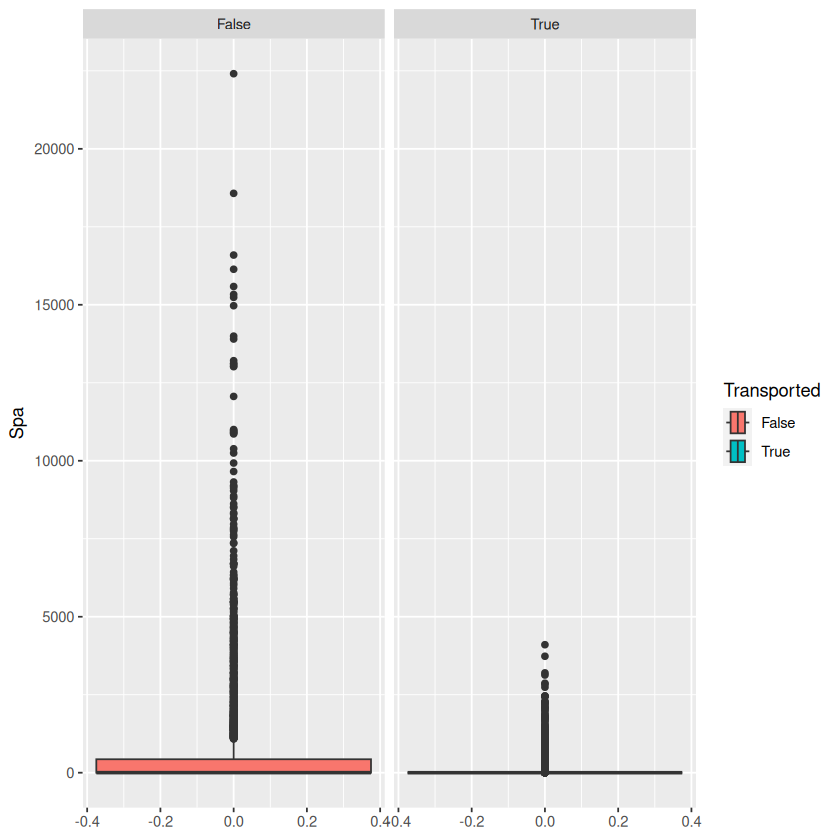

In [98]:
ggplot(df_imputed, aes(x = Spa, fill = Transported)) +
    geom_boxplot() +
    coord_flip() +
    facet_wrap(~Transported)

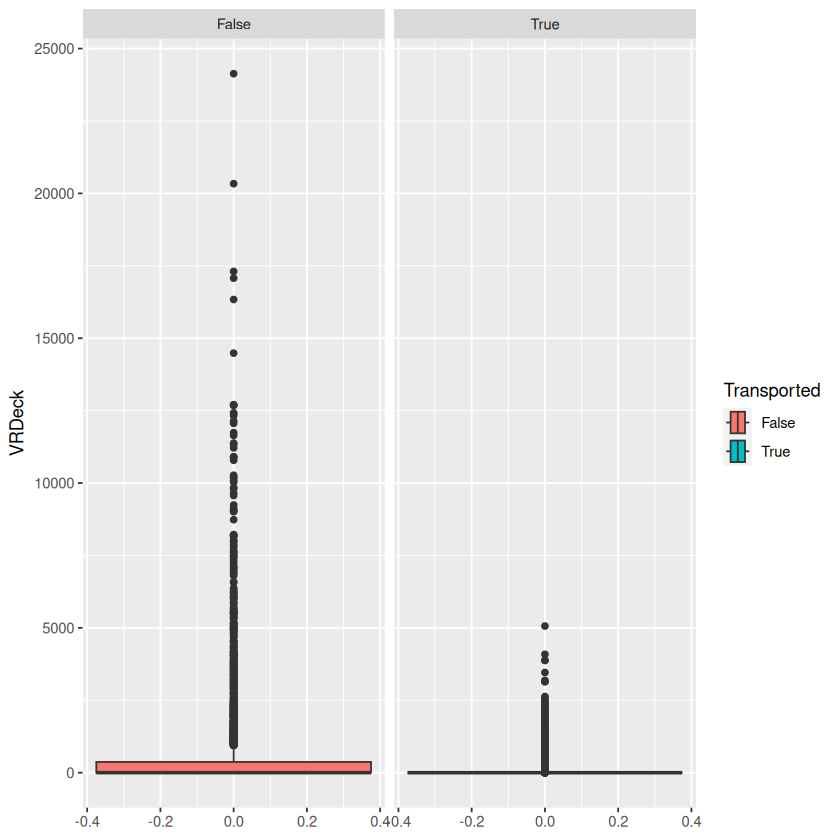

In [99]:
ggplot(df_imputed, aes(x = VRDeck, fill = Transported)) +
    geom_boxplot() +
    coord_flip() +
    facet_wrap(~Transported)

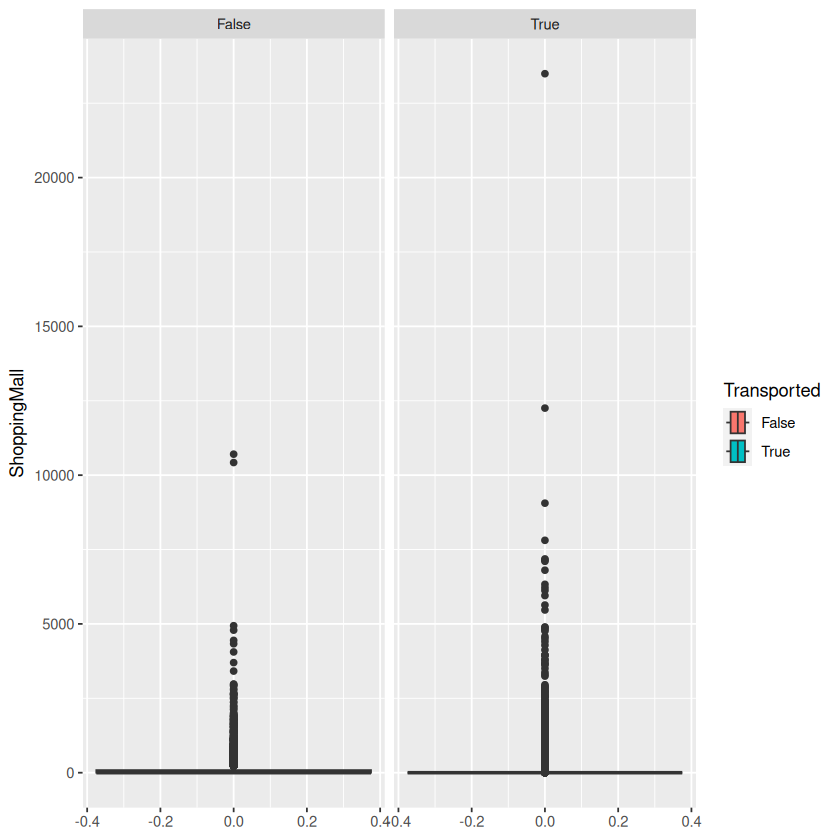

In [100]:
ggplot(df_imputed, aes(x = ShoppingMall, fill = Transported)) +
    geom_boxplot() +
    coord_flip() +
    facet_wrap(~Transported)

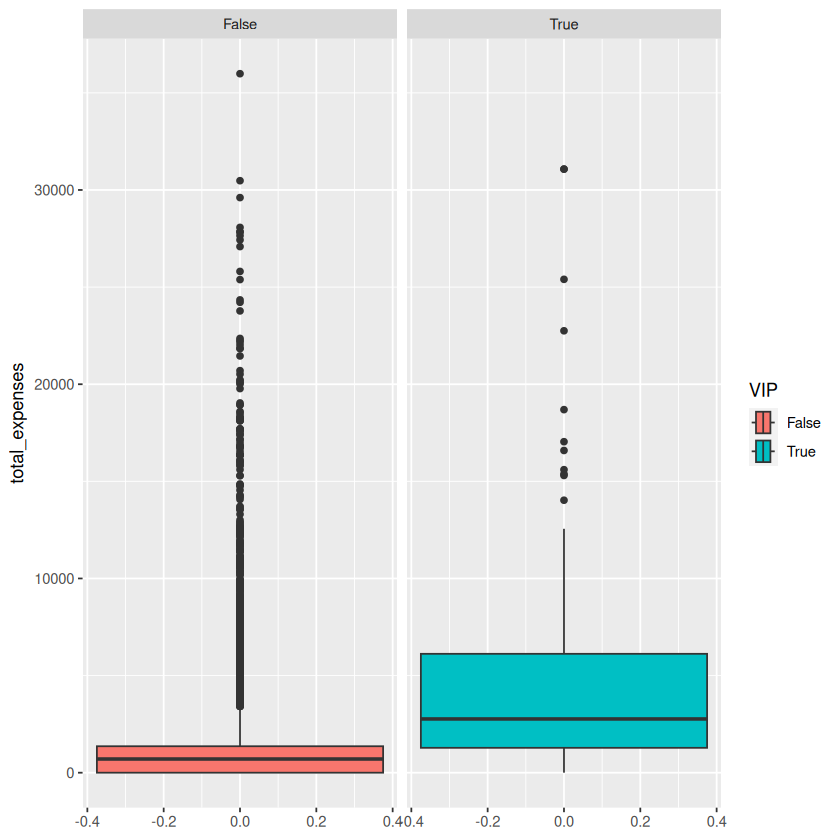

In [101]:
ggplot(df_imputed %>% mutate(total_expenses = RoomService + FoodCourt + Spa + ShoppingMall + VRDeck), aes(x = total_expenses, fill = VIP)) +
    geom_boxplot() +
    coord_flip() +
    facet_wrap(~VIP)

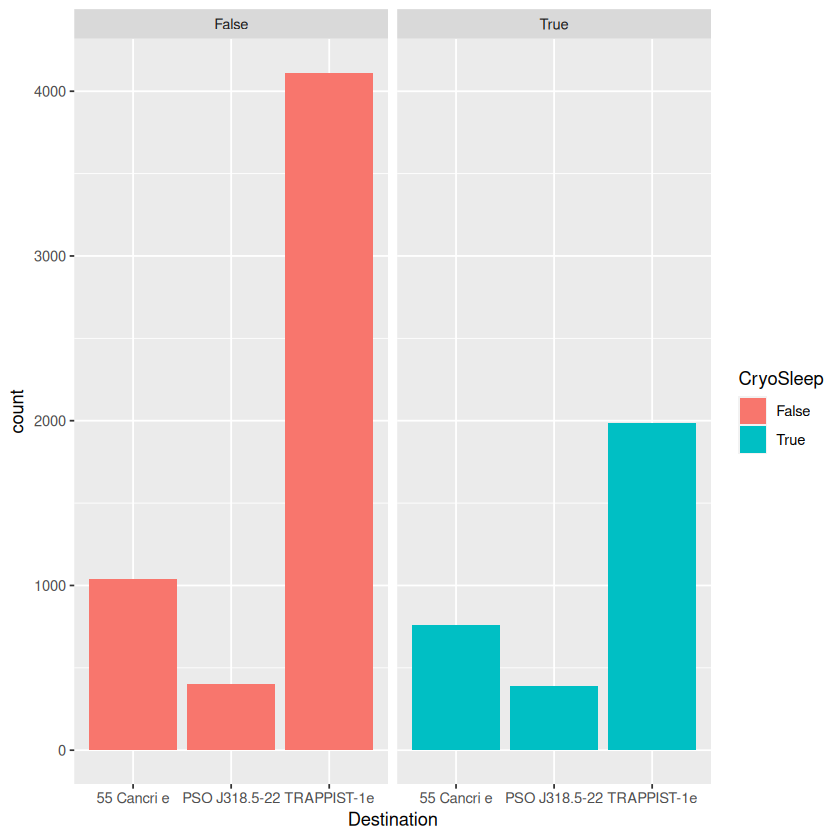

In [105]:
ggplot(df_imputed, aes(x = Destination, fill = CryoSleep)) +
    geom_bar() +
    facet_wrap(~CryoSleep)

In [ ]:
ggplot(df, aes(x = VIP, fill=Transported)) +
    geom_bar(color='black', alpha=0.5, position='identity') +
    scale_y_continuous(breaks = seq(0,5000,200))

In [ ]:
# Ricardo: ¿Por qué en el rango entre 800 y 1100 hay más transportados?

ggplot(df %>% filter(CryoSleep == "True"), aes(x = Cabin_num,fill=Transported)) +
    geom_density(alpha=0.5)+
scale_x_continuous(breaks = seq(0,1800,200))

In [ ]:
ggplot(df, aes(x = Cabin_num,fill=Transported)) +
    geom_bar()+
scale_x_continuous(breaks = seq(0,1800,200))

In [ ]:
str(df)

In [ ]:
ggplot(df_imputed,aes(x = RoomService,fill=Transported))+
        geom_density()

In [ ]:
table(df$CryoSleep)

In [ ]:
set_plot_dimensions(14,8)

ggplot(df,aes(x = RoomService,fill=CryoSleep))+
        geom_density() + facet_wrap(~CryoSleep,scales='free')


ggplot(df,aes(x = RoomService,fill=CryoSleep))+
        geom_boxplot()

In [ ]:
df1 = df_imputed %>% filter(CryoSleep=='True') %>% select_if(is.numeric) %>% 
     select(-Cabin_num)

head(df1)
table(df1$RoomService)

In [ ]:
df %>% filter(CryoSleep=='True',VIP=='True')

In [ ]:
df = df_imputed %>% mutate(total_expens = RoomService + FoodCourt + ShoppingMall + Spa +
                  VRDeck)

In [ ]:
df_imputed %>% group_by(Transported) %>%summarize(mean_expens = mean(total_expens,na.rm=TRUE)) 

In [ ]:
df_imputed %>% group_by(VIP) %>%summarize(mean_expens = mean(total_expens,na.rm=TRUE))

In [ ]:

df_imputed %>% group_by(CryoSleep) %>%summarize(mean_expens = mean(total_expens,na.rm=TRUE))

## Missing values en el conjunto de test

In [ ]:
# Cargamos datos
df_test = read.csv("data/test.csv", header = TRUE)
head(df_test)

In [ ]:
# Lo mismo que antes, dividimos la variable Cabin en sus componentes
splitted_test = str_split(df_test$Cabin, '/', simplify = TRUE)

In [ ]:
df_test = df_test %>% mutate(Cabin_deck = splitted_test[, 1], 
                   Cabin_num = as.integer(splitted_test[, 2]), 
                   Cabin_side = splitted_test[, 3]) %>% select(-Cabin)
head(df_test)

In [ ]:
df_test$Cabin_deck[df_test$Cabin_deck == ""] = NA
df_test$Cabin_num[df_test$Cabin_num == ""] = NA
df_test$Cabin_side[df_test$Cabin_side == ""] = NA
df_test$HomePlanet[df_test$HomePlanet == ""] = NA
df_test$Destination[df_test$Destination == ""] = NA
df_test$CryoSleep[df_test$CryoSleep == ""] = NA
df_test$VIP[df_test$VIP == ""] = NA

In [ ]:
missmap(df_test)
# Ricardo: efectivamente hay valores perdidos en el conjunto de test

In [ ]:
# Porcentaje de filas completas para el conjunto de test
sum(complete.cases(df_test))/nrow(df_test)

# Ricardo: la proporción de datos completos es muy parecida al conjunto de entrenamiento.

In [ ]:
# Comentarios generales:

# Ricardo (28/12/2022):
# -Os he dejado algunos comentarios en los que he puesto mi nombre.
# -Creo que deberíamos dejar bonito el notebook para entregarlo, para ello igual nos conviene poner un apartado definiendo
# el problema y describiendo brevemente las variables, además de ir incluyendo los pasos que hemos seguido en Introducción a la 
# ciencia de datos como apartados. Igual no hacer un análisis tan exhaustivo, pero lo suficiente para que conozcamos 
# bien las variables. Aunque igual podemos utilizar este notebook como borrador.
# -Por otro lado propongo dejar esta celda al final del documento por si queréis ir añadiendo comentarios para el resto,
# incluyendo vuestro nombre y añadiendo la fecha para dejar como una especie de "registro" y así
# no saturamos el grupo de whats app